##### CAPSTONE PROJECT

###### Problem statement: 
# Creation of Intelligent Regression based data model to predict house / home prices on basis of sales data in Seattle region from 2014 to 2015. Data models take into account various features like area, location, amenities and condition

A house value is simply more than location and square footage. Like the features that make 
up a person, an educated party would want to know all aspects that give a house its value. For 
example, you want to sell a house and you don’t know the price which you can take — it can’t 
be too low or too high. To find house price you usually try to find similar properties in your 
neighbourhood and based on gathered data you will try to assess your house price

In [2]:
%matplotlib inline
# all the basic libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style= 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
# pre-processing method
from sklearn.model_selection import train_test_split

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#pyod models
from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from joblib import dump, load

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time

###### Reading the data

In [3]:
caps_df = pd.read_csv('innercity.csv')

In [4]:
caps_df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


###### Exploring the given dataset

In [5]:
caps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
caps_df.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [7]:
caps_df.shape

(21613, 23)

In [8]:
caps_df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

In [9]:
for value in ['cid','dayhours','price','room_bed','room_bath','living_measure','lot_measure','ceil','coast','sight','condition','quality','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat','long','living_measure15','lot_measure15','furnished','total_area']:
    print(value,":",sum(caps_df[value] == '?'))

cid : 0
dayhours : 0
price : 0
room_bed : 0
room_bath : 0
living_measure : 0
lot_measure : 0
ceil : 0
coast : 0
sight : 0
condition : 0
quality : 0
ceil_measure : 0
basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
living_measure15 : 0
lot_measure15 : 0
furnished : 0
total_area : 0


In [10]:
caps_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


###### Data Visualization

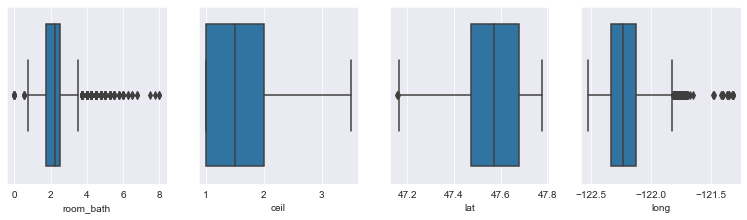

In [11]:
numeric_col = caps_df.columns[pd.Series(caps_df.columns).apply(lambda x : caps_df[x].dtype == 'float64')]  # Non object columns

plt.figure(figsize = (20,15))

j = 1
for i in numeric_col:
    plt.subplot(4,6,j)
    sns.boxplot(caps_df[i])
    j += 1

<AxesSubplot:xlabel='price'>

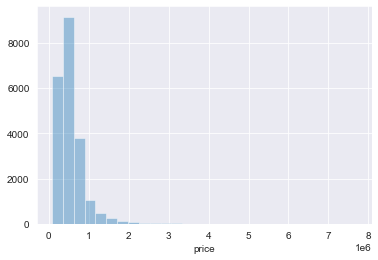

In [12]:
#pd.value_counts(caps_df["price"]).plot(kind="bar")
sns.distplot(caps_df['price'],kde=False, bins=28)

<AxesSubplot:xlabel='ceil', ylabel='room_bed'>

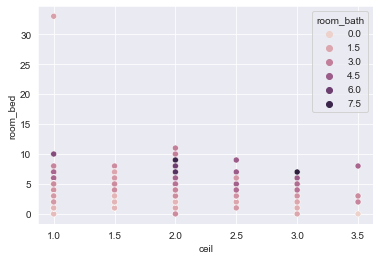

In [13]:
sns.scatterplot(caps_df['ceil'], caps_df['room_bed'],caps_df['room_bath'])

<AxesSubplot:title={'center':'Pearson Correlation of attributes'}>

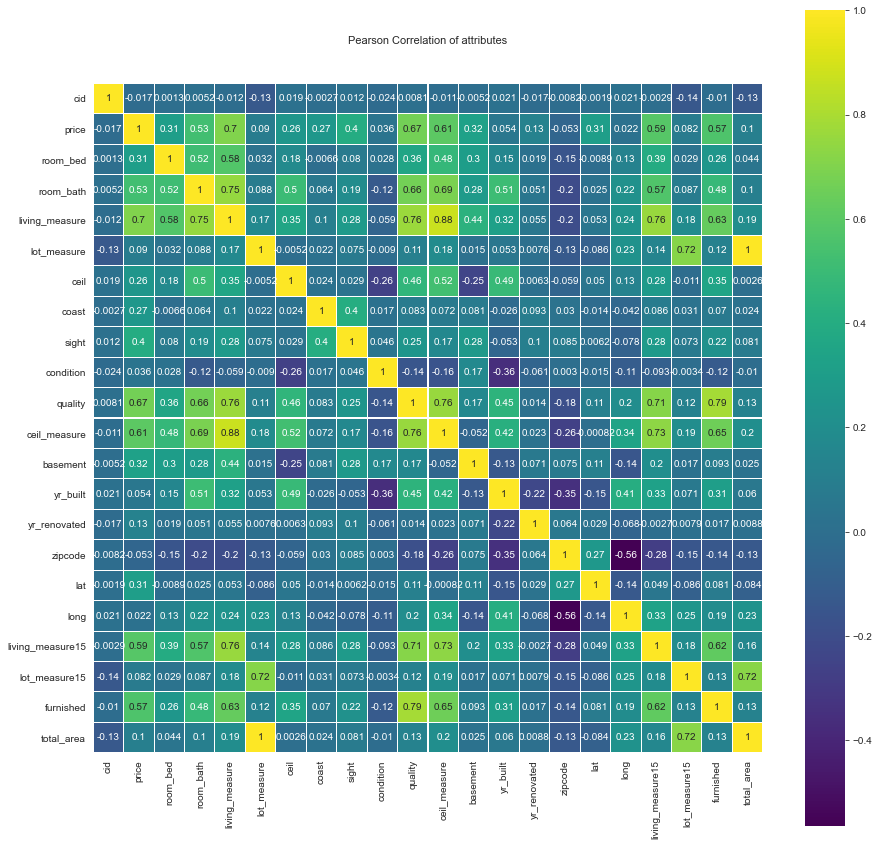

In [14]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=11)
sns.heatmap(caps_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
caps_df.groupby(["price"]).count()

,cid,dayhours,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,,,,,,,,,,,,,,,,,,,,,
75000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
78000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
82000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5570000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6890000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


###### cid column can be dropped as it is of no use in analysis 

In [16]:
caps_df = caps_df.drop(labels = "cid", axis =1)

In [17]:
caps_df.shape

(21613, 22)

In [18]:
caps_df.groupby(["price"]).mean()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
price,,,,,,,,,,,,,,,,,,,,
75000,1.0,0.00,670.0,43377.0,1.0,0.0,0.0,3.0,3.0,670.0,0.0,1966.0,0.0,98022.0,47.2638,-121.906,1160.0,42882.0,0.0,44047.0
78000,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,1942.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0,0.0,17124.0
80000,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,1912.0,0.0,98014.0,47.6499,-121.909,1200.0,7500.0,0.0,5480.0
81000,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,1943.0,0.0,98168.0,47.4808,-122.315,860.0,9000.0,0.0,10705.0
82000,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,1954.0,0.0,98146.0,47.4987,-122.341,1140.0,11250.0,0.0,11286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,12.0,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0,1.0,31985.0
5570000,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0,1.0,44269.0
6890000,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0,1.0,41264.0


###### Train and Test split the given data

In [19]:
from scipy.stats import zscore
x=caps_df[["room_bed","room_bath","quality","living_measure","lot_measure","ceil_measure","yr_built","lat","living_measure15","lot_measure15","total_area"]]
y=caps_df["price"]
X  = x.apply(zscore)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

b1= regression_model.coef_
b0=regression_model.intercept_
print("b1 is: {} and b0 is : {}".format(b1, b0))

b1 is: [-41745.94325265  39392.50886082 127775.51744418 167464.59956819
   -815.09063693  -1817.64244435 -99406.23609756  70936.82137457
  22877.97725081 -10817.8731445    2886.45150195] and b0 is : 540404.4405786716


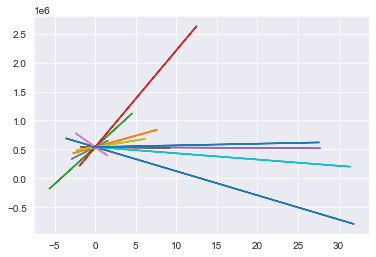

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

###### Model the given data

In [23]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data
    
    sse = np.sum(pred - y_test)#sum of squares estimator
    
    tss = np.sum(pred - np.mean(pred)**2) #total sum of squares
    
    r2 = 1 - sse / tss
    
    r2 = metrics.r2_score(y_test, pred)  # calculate the r squared value on the test data
    print("r2 :",r2)
    rmse = sqrt(metrics.mean_squared_error(y_test, pred))   # Root mean squared error
    
    
    rmsle = sqrt(metrics.mean_squared_log_error(np.abs(y_test), np.abs(pred)))  # Root mean squared log error (since the numbers are huge)
    
    
    scorer = {'r2' : metrics.make_scorer(metrics.r2_score),
              'mse' : metrics.make_scorer(metrics.mean_squared_error),
              'msle' : metrics.make_scorer(metrics.mean_squared_log_error),
               }    # make scorers to be used in cross validation
    
    cv = cross_validate(model, X_train, y_train, cv=10, scoring = scorer)   # perform cross validation across 3 metrics
    
    r2_cv =  np.mean(r2 in cv['test_r2'])
    
       
    rmse_cv = np.mean([sqrt(rmse) for mse in cv['test_mse']]) # mean RMSE value(take root of individual mse value and then mean)
    
    rmsle_cv = np.mean([sqrt(rmsle) for msle in cv['test_msle']]) # mean RMSLE
    
    end = time.time()  #note the end time
    
    
    duration = end - start  # calculate the total duration
    
    
    return r2, rmse, rmsle, r2_cv, rmse_cv, rmsle_cv, duration, pred  # return all the metrics along with predictions

In [24]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
lr = LinearRegression()        
dt = DecisionTreeRegressor(random_state=1,min_samples_split=50,min_samples_leaf=50)   
#Build the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

diab_model = GaussianNB()
diab_model.fit(X_train, y_train.ravel())
#br = BaggingRegressor(random_state=1)
#rf = RandomForestRegressor(random_state=1, n_estimators=100)  # specifying n_estimators to avoid "future warnings"
#gb = GradientBoostingRegressor(random_state=1, n_estimators=100)
br = BaggingRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1, n_estimators=100)
gb = GradientBoostingRegressor(random_state=1, n_estimators=100)
xgb = XGBRegressor()
cgb = CatBoostRegressor()
lgb = LGBMRegressor()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models


# putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary

for model, name, in zip([lr, dt, br, rf,
                         gb, xgb, cgb, lgb], ['Linear Regression', 'Decision Tree','Bagging Ensemble', 'Random Forest',
                                              'Gradient Boost Ensemble', 'Xgboost', 'Catboost','LightGB']):

    result[name] = fit_n_print(model,X_train, X_test,y_train, y_test)  
    # store all the metrics in the result dict, with name as key


r2 : 0.6688126558053102
r2 : 0.7033800285312959
r2 : 0.7943658141425072
r2 : 0.8104586974778181
r2 : 0.8128753420406649
r2 : 0.8070993673358985
Learning rate set to 0.064823
0:	learn: 353090.4528504	total: 173ms	remaining: 2m 52s
1:	learn: 339802.6324164	total: 181ms	remaining: 1m 30s
2:	learn: 327208.6804558	total: 187ms	remaining: 1m 2s
3:	learn: 316234.1278798	total: 193ms	remaining: 48.1s
4:	learn: 305807.0447669	total: 199ms	remaining: 39.5s
5:	learn: 296249.7428998	total: 205ms	remaining: 34s
6:	learn: 286893.4464728	total: 211ms	remaining: 29.9s
7:	learn: 278616.2120674	total: 217ms	remaining: 26.9s
8:	learn: 270579.0859171	total: 224ms	remaining: 24.6s
9:	learn: 263673.6015327	total: 230ms	remaining: 22.8s
10:	learn: 256836.5773723	total: 236ms	remaining: 21.2s
11:	learn: 250177.3398652	total: 242ms	remaining: 19.9s
12:	learn: 244679.8755856	total: 247ms	remaining: 18.8s
13:	learn: 239407.6720926	total: 253ms	remaining: 17.8s
14:	learn: 234596.7510884	total: 259ms	remaining: 17

147:	learn: 141119.0133976	total: 1.07s	remaining: 6.18s
148:	learn: 141034.4698973	total: 1.08s	remaining: 6.16s
149:	learn: 140917.6178553	total: 1.08s	remaining: 6.15s
150:	learn: 140737.5018978	total: 1.09s	remaining: 6.13s
151:	learn: 140597.0246807	total: 1.1s	remaining: 6.12s
152:	learn: 140557.8168179	total: 1.1s	remaining: 6.1s
153:	learn: 140325.1204463	total: 1.11s	remaining: 6.08s
154:	learn: 140189.5277179	total: 1.11s	remaining: 6.07s
155:	learn: 139964.7317380	total: 1.12s	remaining: 6.05s
156:	learn: 139778.2229635	total: 1.13s	remaining: 6.04s
157:	learn: 139680.0219647	total: 1.13s	remaining: 6.03s
158:	learn: 139569.6483043	total: 1.14s	remaining: 6.01s
159:	learn: 139277.3916789	total: 1.14s	remaining: 6s
160:	learn: 139218.5532458	total: 1.15s	remaining: 5.98s
161:	learn: 139076.8503719	total: 1.15s	remaining: 5.97s
162:	learn: 138927.4544735	total: 1.16s	remaining: 5.95s
163:	learn: 138898.4835787	total: 1.17s	remaining: 5.94s
164:	learn: 138831.0395742	total: 1.1

298:	learn: 126078.0299692	total: 1.97s	remaining: 4.61s
299:	learn: 125988.9422554	total: 1.97s	remaining: 4.6s
300:	learn: 125981.4935484	total: 1.98s	remaining: 4.59s
301:	learn: 125905.2368462	total: 1.98s	remaining: 4.58s
302:	learn: 125845.0238466	total: 1.99s	remaining: 4.57s
303:	learn: 125773.1651754	total: 1.99s	remaining: 4.56s
304:	learn: 125670.3619209	total: 2s	remaining: 4.55s
305:	learn: 125594.9857131	total: 2s	remaining: 4.54s
306:	learn: 125586.5439785	total: 2.01s	remaining: 4.54s
307:	learn: 125500.8148179	total: 2.02s	remaining: 4.53s
308:	learn: 125455.8377822	total: 2.02s	remaining: 4.52s
309:	learn: 125382.4529506	total: 2.02s	remaining: 4.51s
310:	learn: 125345.5833207	total: 2.03s	remaining: 4.5s
311:	learn: 125206.3498105	total: 2.04s	remaining: 4.49s
312:	learn: 125105.9751931	total: 2.04s	remaining: 4.48s
313:	learn: 125011.6920630	total: 2.05s	remaining: 4.47s
314:	learn: 124911.5613194	total: 2.05s	remaining: 4.46s
315:	learn: 124856.9348437	total: 2.06s

454:	learn: 115674.7763639	total: 2.86s	remaining: 3.42s
455:	learn: 115590.6409460	total: 2.86s	remaining: 3.42s
456:	learn: 115532.2223924	total: 2.87s	remaining: 3.41s
457:	learn: 115513.6702480	total: 2.88s	remaining: 3.4s
458:	learn: 115453.1380542	total: 2.88s	remaining: 3.4s
459:	learn: 115375.8912312	total: 2.89s	remaining: 3.39s
460:	learn: 115294.5180002	total: 2.89s	remaining: 3.38s
461:	learn: 115291.0101086	total: 2.9s	remaining: 3.38s
462:	learn: 115267.4511910	total: 2.9s	remaining: 3.37s
463:	learn: 115233.5976728	total: 2.91s	remaining: 3.36s
464:	learn: 115184.1829537	total: 2.92s	remaining: 3.36s
465:	learn: 115095.6314293	total: 2.92s	remaining: 3.35s
466:	learn: 115090.6410197	total: 2.93s	remaining: 3.34s
467:	learn: 115020.6926968	total: 2.93s	remaining: 3.33s
468:	learn: 114991.5411704	total: 2.94s	remaining: 3.33s
469:	learn: 114976.5312706	total: 2.95s	remaining: 3.32s
470:	learn: 114923.8814593	total: 2.95s	remaining: 3.31s
471:	learn: 114878.3969466	total: 2

606:	learn: 108894.6001252	total: 3.74s	remaining: 2.42s
607:	learn: 108860.9209682	total: 3.75s	remaining: 2.42s
608:	learn: 108826.0243669	total: 3.76s	remaining: 2.41s
609:	learn: 108806.5206824	total: 3.76s	remaining: 2.4s
610:	learn: 108778.3569453	total: 3.77s	remaining: 2.4s
611:	learn: 108736.0228139	total: 3.77s	remaining: 2.39s
612:	learn: 108664.0853363	total: 3.78s	remaining: 2.39s
613:	learn: 108628.8634516	total: 3.79s	remaining: 2.38s
614:	learn: 108564.7541661	total: 3.79s	remaining: 2.37s
615:	learn: 108524.0863083	total: 3.8s	remaining: 2.37s
616:	learn: 108492.3297922	total: 3.8s	remaining: 2.36s
617:	learn: 108454.2741421	total: 3.81s	remaining: 2.35s
618:	learn: 108397.6693670	total: 3.81s	remaining: 2.35s
619:	learn: 108346.4881593	total: 3.82s	remaining: 2.34s
620:	learn: 108283.2216343	total: 3.83s	remaining: 2.33s
621:	learn: 108202.2071991	total: 3.83s	remaining: 2.33s
622:	learn: 108154.7585341	total: 3.84s	remaining: 2.32s
623:	learn: 108132.4552738	total: 3

757:	learn: 103291.5474096	total: 4.64s	remaining: 1.48s
758:	learn: 103267.2572892	total: 4.64s	remaining: 1.47s
759:	learn: 103223.0421087	total: 4.65s	remaining: 1.47s
760:	learn: 103196.5197376	total: 4.65s	remaining: 1.46s
761:	learn: 103145.0572172	total: 4.66s	remaining: 1.46s
762:	learn: 103143.6672151	total: 4.67s	remaining: 1.45s
763:	learn: 103127.5974969	total: 4.67s	remaining: 1.44s
764:	learn: 103112.5384424	total: 4.68s	remaining: 1.44s
765:	learn: 103053.8417965	total: 4.68s	remaining: 1.43s
766:	learn: 103009.6689105	total: 4.69s	remaining: 1.43s
767:	learn: 102965.8072003	total: 4.7s	remaining: 1.42s
768:	learn: 102948.7861736	total: 4.7s	remaining: 1.41s
769:	learn: 102916.4199129	total: 4.71s	remaining: 1.41s
770:	learn: 102900.0119843	total: 4.72s	remaining: 1.4s
771:	learn: 102871.2302406	total: 4.72s	remaining: 1.39s
772:	learn: 102846.4042629	total: 4.73s	remaining: 1.39s
773:	learn: 102818.7328080	total: 4.73s	remaining: 1.38s
774:	learn: 102799.6888815	total: 

924:	learn: 98148.9845731	total: 5.71s	remaining: 463ms
925:	learn: 98123.0225257	total: 5.72s	remaining: 457ms
926:	learn: 98107.2182921	total: 5.73s	remaining: 451ms
927:	learn: 98085.7990339	total: 5.73s	remaining: 445ms
928:	learn: 98056.7178076	total: 5.74s	remaining: 439ms
929:	learn: 98035.5502427	total: 5.75s	remaining: 432ms
930:	learn: 98016.5562440	total: 5.75s	remaining: 426ms
931:	learn: 97978.3238956	total: 5.76s	remaining: 420ms
932:	learn: 97945.6251001	total: 5.76s	remaining: 414ms
933:	learn: 97927.5686075	total: 5.77s	remaining: 408ms
934:	learn: 97900.7933946	total: 5.78s	remaining: 402ms
935:	learn: 97867.3341026	total: 5.79s	remaining: 396ms
936:	learn: 97851.7740487	total: 5.79s	remaining: 389ms
937:	learn: 97839.1335965	total: 5.8s	remaining: 383ms
938:	learn: 97796.5651038	total: 5.8s	remaining: 377ms
939:	learn: 97773.5336926	total: 5.81s	remaining: 371ms
940:	learn: 97754.8045433	total: 5.82s	remaining: 365ms
941:	learn: 97741.8917199	total: 5.82s	remaining: 

91:	learn: 152065.6148080	total: 531ms	remaining: 5.24s
92:	learn: 151760.8435869	total: 537ms	remaining: 5.24s
93:	learn: 151519.4022849	total: 542ms	remaining: 5.22s
94:	learn: 151271.4624164	total: 547ms	remaining: 5.21s
95:	learn: 150978.3363751	total: 552ms	remaining: 5.2s
96:	learn: 150840.5029189	total: 558ms	remaining: 5.19s
97:	learn: 150604.0064474	total: 563ms	remaining: 5.18s
98:	learn: 150355.3147531	total: 569ms	remaining: 5.18s
99:	learn: 150078.0597980	total: 575ms	remaining: 5.17s
100:	learn: 149857.1897210	total: 581ms	remaining: 5.17s
101:	learn: 149634.8854625	total: 586ms	remaining: 5.16s
102:	learn: 149413.9033833	total: 592ms	remaining: 5.16s
103:	learn: 149180.7890572	total: 598ms	remaining: 5.15s
104:	learn: 148873.3453400	total: 604ms	remaining: 5.15s
105:	learn: 148650.4262057	total: 610ms	remaining: 5.14s
106:	learn: 148596.2755810	total: 616ms	remaining: 5.14s
107:	learn: 148484.4647106	total: 621ms	remaining: 5.13s
108:	learn: 148242.9502668	total: 627ms	r

244:	learn: 130779.1009621	total: 1.42s	remaining: 4.37s
245:	learn: 130647.9790513	total: 1.42s	remaining: 4.37s
246:	learn: 130543.6297900	total: 1.43s	remaining: 4.36s
247:	learn: 130461.1657574	total: 1.44s	remaining: 4.35s
248:	learn: 130401.2176825	total: 1.44s	remaining: 4.35s
249:	learn: 130323.1303674	total: 1.45s	remaining: 4.34s
250:	learn: 130189.0210476	total: 1.45s	remaining: 4.33s
251:	learn: 130100.2428221	total: 1.46s	remaining: 4.33s
252:	learn: 130012.0921444	total: 1.46s	remaining: 4.32s
253:	learn: 129921.8199666	total: 1.47s	remaining: 4.31s
254:	learn: 129769.9972128	total: 1.47s	remaining: 4.31s
255:	learn: 129704.4615450	total: 1.48s	remaining: 4.3s
256:	learn: 129660.2489572	total: 1.49s	remaining: 4.3s
257:	learn: 129583.3758880	total: 1.49s	remaining: 4.29s
258:	learn: 129480.3375062	total: 1.5s	remaining: 4.29s
259:	learn: 129344.0260212	total: 1.5s	remaining: 4.28s
260:	learn: 129286.6742638	total: 1.51s	remaining: 4.27s
261:	learn: 129248.0389262	total: 1

405:	learn: 119107.0049734	total: 2.31s	remaining: 3.38s
406:	learn: 119067.4456491	total: 2.32s	remaining: 3.38s
407:	learn: 118957.4372829	total: 2.32s	remaining: 3.37s
408:	learn: 118890.3985530	total: 2.33s	remaining: 3.36s
409:	learn: 118828.8186372	total: 2.33s	remaining: 3.36s
410:	learn: 118787.5433838	total: 2.34s	remaining: 3.35s
411:	learn: 118739.6376788	total: 2.35s	remaining: 3.35s
412:	learn: 118704.1074632	total: 2.35s	remaining: 3.34s
413:	learn: 118622.5929184	total: 2.36s	remaining: 3.33s
414:	learn: 118571.3552931	total: 2.36s	remaining: 3.33s
415:	learn: 118530.3717100	total: 2.37s	remaining: 3.32s
416:	learn: 118460.9589066	total: 2.37s	remaining: 3.32s
417:	learn: 118392.0772437	total: 2.38s	remaining: 3.31s
418:	learn: 118317.8607648	total: 2.38s	remaining: 3.31s
419:	learn: 118281.9440798	total: 2.39s	remaining: 3.3s
420:	learn: 118209.4874217	total: 2.4s	remaining: 3.3s
421:	learn: 118156.3500843	total: 2.4s	remaining: 3.29s
422:	learn: 118119.3555621	total: 2

565:	learn: 111268.5423271	total: 3.2s	remaining: 2.45s
566:	learn: 111194.7480733	total: 3.21s	remaining: 2.45s
567:	learn: 111155.0862708	total: 3.21s	remaining: 2.44s
568:	learn: 111093.3049231	total: 3.22s	remaining: 2.44s
569:	learn: 111046.1225057	total: 3.22s	remaining: 2.43s
570:	learn: 110973.4499691	total: 3.23s	remaining: 2.42s
571:	learn: 110908.7141160	total: 3.23s	remaining: 2.42s
572:	learn: 110834.5622849	total: 3.24s	remaining: 2.41s
573:	learn: 110805.8330704	total: 3.24s	remaining: 2.41s
574:	learn: 110735.1321927	total: 3.25s	remaining: 2.4s
575:	learn: 110697.0902092	total: 3.25s	remaining: 2.4s
576:	learn: 110636.9859283	total: 3.26s	remaining: 2.39s
577:	learn: 110593.9327521	total: 3.27s	remaining: 2.38s
578:	learn: 110524.4774767	total: 3.27s	remaining: 2.38s
579:	learn: 110463.2279494	total: 3.28s	remaining: 2.37s
580:	learn: 110446.1967487	total: 3.28s	remaining: 2.37s
581:	learn: 110391.0684245	total: 3.29s	remaining: 2.36s
582:	learn: 110366.5510122	total: 

738:	learn: 103923.6389936	total: 4.27s	remaining: 1.51s
739:	learn: 103870.6173123	total: 4.27s	remaining: 1.5s
740:	learn: 103840.3242951	total: 4.28s	remaining: 1.5s
741:	learn: 103814.4134904	total: 4.28s	remaining: 1.49s
742:	learn: 103793.0680782	total: 4.29s	remaining: 1.48s
743:	learn: 103762.8198823	total: 4.3s	remaining: 1.48s
744:	learn: 103713.3884995	total: 4.3s	remaining: 1.47s
745:	learn: 103664.6893143	total: 4.31s	remaining: 1.47s
746:	learn: 103605.2224159	total: 4.31s	remaining: 1.46s
747:	learn: 103579.6259698	total: 4.32s	remaining: 1.45s
748:	learn: 103556.9720274	total: 4.32s	remaining: 1.45s
749:	learn: 103556.2040710	total: 4.33s	remaining: 1.44s
750:	learn: 103520.5077949	total: 4.33s	remaining: 1.44s
751:	learn: 103495.3738609	total: 4.34s	remaining: 1.43s
752:	learn: 103468.3283213	total: 4.35s	remaining: 1.43s
753:	learn: 103423.9876524	total: 4.35s	remaining: 1.42s
754:	learn: 103397.7675014	total: 4.36s	remaining: 1.41s
755:	learn: 103372.4156593	total: 4

893:	learn: 98874.7041414	total: 5.16s	remaining: 612ms
894:	learn: 98852.6128825	total: 5.17s	remaining: 606ms
895:	learn: 98815.3729819	total: 5.17s	remaining: 601ms
896:	learn: 98781.6190247	total: 5.18s	remaining: 595ms
897:	learn: 98737.1521944	total: 5.19s	remaining: 589ms
898:	learn: 98691.1617826	total: 5.2s	remaining: 584ms
899:	learn: 98670.8769676	total: 5.2s	remaining: 578ms
900:	learn: 98638.5193785	total: 5.21s	remaining: 572ms
901:	learn: 98613.7531796	total: 5.21s	remaining: 567ms
902:	learn: 98562.0690591	total: 5.22s	remaining: 561ms
903:	learn: 98521.9480054	total: 5.23s	remaining: 555ms
904:	learn: 98491.9056178	total: 5.24s	remaining: 550ms
905:	learn: 98450.7371677	total: 5.24s	remaining: 544ms
906:	learn: 98415.8092890	total: 5.25s	remaining: 538ms
907:	learn: 98400.0647547	total: 5.25s	remaining: 533ms
908:	learn: 98359.3507182	total: 5.26s	remaining: 527ms
909:	learn: 98326.6390272	total: 5.27s	remaining: 521ms
910:	learn: 98310.1393766	total: 5.28s	remaining: 

62:	learn: 158676.6198664	total: 349ms	remaining: 5.19s
63:	learn: 158259.1909974	total: 354ms	remaining: 5.18s
64:	learn: 157700.0761090	total: 360ms	remaining: 5.18s
65:	learn: 157510.3498672	total: 365ms	remaining: 5.17s
66:	learn: 156739.1736624	total: 371ms	remaining: 5.17s
67:	learn: 156311.6162534	total: 376ms	remaining: 5.16s
68:	learn: 155994.7666613	total: 382ms	remaining: 5.15s
69:	learn: 155833.9452245	total: 387ms	remaining: 5.14s
70:	learn: 155411.9037010	total: 393ms	remaining: 5.14s
71:	learn: 154912.7729073	total: 399ms	remaining: 5.14s
72:	learn: 154620.8894651	total: 404ms	remaining: 5.13s
73:	learn: 154257.9007638	total: 410ms	remaining: 5.13s
74:	learn: 153746.4737050	total: 417ms	remaining: 5.14s
75:	learn: 153311.1076583	total: 422ms	remaining: 5.13s
76:	learn: 153052.0719085	total: 428ms	remaining: 5.13s
77:	learn: 152972.2351727	total: 433ms	remaining: 5.12s
78:	learn: 152498.0617959	total: 439ms	remaining: 5.12s
79:	learn: 152063.4371372	total: 445ms	remaining

221:	learn: 131053.4071850	total: 1.24s	remaining: 4.34s
222:	learn: 130955.9302112	total: 1.24s	remaining: 4.33s
223:	learn: 130781.1955522	total: 1.25s	remaining: 4.33s
224:	learn: 130616.2137550	total: 1.25s	remaining: 4.32s
225:	learn: 130515.3839232	total: 1.26s	remaining: 4.32s
226:	learn: 130360.8392984	total: 1.27s	remaining: 4.31s
227:	learn: 130353.4535037	total: 1.27s	remaining: 4.31s
228:	learn: 130308.6594555	total: 1.28s	remaining: 4.3s
229:	learn: 130193.4238620	total: 1.28s	remaining: 4.3s
230:	learn: 130062.0573554	total: 1.29s	remaining: 4.29s
231:	learn: 130054.7399980	total: 1.29s	remaining: 4.29s
232:	learn: 129969.5631798	total: 1.3s	remaining: 4.28s
233:	learn: 129855.7899514	total: 1.3s	remaining: 4.27s
234:	learn: 129750.5242774	total: 1.31s	remaining: 4.27s
235:	learn: 129679.6682714	total: 1.32s	remaining: 4.26s
236:	learn: 129618.6249153	total: 1.32s	remaining: 4.26s
237:	learn: 129533.8624162	total: 1.33s	remaining: 4.25s
238:	learn: 129456.9933454	total: 1

383:	learn: 118836.1849761	total: 2.13s	remaining: 3.41s
384:	learn: 118725.4120682	total: 2.13s	remaining: 3.41s
385:	learn: 118683.7184818	total: 2.14s	remaining: 3.4s
386:	learn: 118636.6861003	total: 2.15s	remaining: 3.4s
387:	learn: 118598.1377784	total: 2.15s	remaining: 3.39s
388:	learn: 118507.8385514	total: 2.16s	remaining: 3.39s
389:	learn: 118407.3559073	total: 2.16s	remaining: 3.38s
390:	learn: 118352.1345879	total: 2.17s	remaining: 3.38s
391:	learn: 118289.2496959	total: 2.17s	remaining: 3.37s
392:	learn: 118199.8090643	total: 2.18s	remaining: 3.37s
393:	learn: 118144.8025434	total: 2.19s	remaining: 3.36s
394:	learn: 118094.2425529	total: 2.19s	remaining: 3.36s
395:	learn: 118052.2738126	total: 2.2s	remaining: 3.35s
396:	learn: 117965.1610176	total: 2.2s	remaining: 3.35s
397:	learn: 117924.1730940	total: 2.21s	remaining: 3.34s
398:	learn: 117825.7310728	total: 2.21s	remaining: 3.33s
399:	learn: 117752.9682998	total: 2.22s	remaining: 3.33s
400:	learn: 117659.6656492	total: 2

542:	learn: 109775.3051305	total: 3.02s	remaining: 2.54s
543:	learn: 109730.5139336	total: 3.02s	remaining: 2.53s
544:	learn: 109688.9808173	total: 3.03s	remaining: 2.53s
545:	learn: 109634.3633108	total: 3.03s	remaining: 2.52s
546:	learn: 109566.5447806	total: 3.04s	remaining: 2.52s
547:	learn: 109524.2738695	total: 3.04s	remaining: 2.51s
548:	learn: 109478.6017967	total: 3.05s	remaining: 2.5s
549:	learn: 109429.9408051	total: 3.05s	remaining: 2.5s
550:	learn: 109395.4652649	total: 3.06s	remaining: 2.49s
551:	learn: 109321.2344237	total: 3.07s	remaining: 2.49s
552:	learn: 109284.0333106	total: 3.07s	remaining: 2.48s
553:	learn: 109248.3232444	total: 3.08s	remaining: 2.48s
554:	learn: 109209.2222231	total: 3.08s	remaining: 2.47s
555:	learn: 109129.1088812	total: 3.09s	remaining: 2.47s
556:	learn: 109075.7363364	total: 3.1s	remaining: 2.46s
557:	learn: 109029.4527685	total: 3.1s	remaining: 2.46s
558:	learn: 108998.5969642	total: 3.11s	remaining: 2.45s
559:	learn: 108952.8750219	total: 3

703:	learn: 103193.9988972	total: 3.91s	remaining: 1.64s
704:	learn: 103165.6217094	total: 3.92s	remaining: 1.64s
705:	learn: 103139.0430753	total: 3.92s	remaining: 1.63s
706:	learn: 103101.6192983	total: 3.93s	remaining: 1.63s
707:	learn: 103031.4004243	total: 3.93s	remaining: 1.62s
708:	learn: 103002.9193689	total: 3.94s	remaining: 1.62s
709:	learn: 102987.5794330	total: 3.95s	remaining: 1.61s
710:	learn: 102952.7821515	total: 3.95s	remaining: 1.61s
711:	learn: 102915.8868069	total: 3.96s	remaining: 1.6s
712:	learn: 102905.8559884	total: 3.96s	remaining: 1.59s
713:	learn: 102850.9374218	total: 3.97s	remaining: 1.59s
714:	learn: 102774.6664688	total: 3.97s	remaining: 1.58s
715:	learn: 102750.7045214	total: 3.98s	remaining: 1.58s
716:	learn: 102709.7611896	total: 3.98s	remaining: 1.57s
717:	learn: 102672.3535636	total: 3.99s	remaining: 1.57s
718:	learn: 102631.8607730	total: 4s	remaining: 1.56s
719:	learn: 102612.3140239	total: 4s	remaining: 1.56s
720:	learn: 102563.2019690	total: 4.01

859:	learn: 98147.8381949	total: 4.79s	remaining: 781ms
860:	learn: 98126.0323416	total: 4.8s	remaining: 775ms
861:	learn: 98085.3972528	total: 4.81s	remaining: 770ms
862:	learn: 98067.1345562	total: 4.81s	remaining: 764ms
863:	learn: 98041.4772044	total: 4.82s	remaining: 759ms
864:	learn: 98027.4671525	total: 4.83s	remaining: 753ms
865:	learn: 97939.7031535	total: 4.83s	remaining: 747ms
866:	learn: 97919.0542590	total: 4.84s	remaining: 742ms
867:	learn: 97906.3952425	total: 4.84s	remaining: 736ms
868:	learn: 97892.4573658	total: 4.85s	remaining: 731ms
869:	learn: 97871.1820285	total: 4.85s	remaining: 725ms
870:	learn: 97850.2494222	total: 4.86s	remaining: 720ms
871:	learn: 97830.6380243	total: 4.86s	remaining: 714ms
872:	learn: 97800.6916977	total: 4.87s	remaining: 709ms
873:	learn: 97756.5313809	total: 4.88s	remaining: 703ms
874:	learn: 97721.1875602	total: 4.88s	remaining: 697ms
875:	learn: 97677.5419640	total: 4.89s	remaining: 692ms
876:	learn: 97637.7222465	total: 4.89s	remaining:

35:	learn: 183894.3416343	total: 195ms	remaining: 5.23s
36:	learn: 182296.9385185	total: 201ms	remaining: 5.24s
37:	learn: 180835.4358257	total: 207ms	remaining: 5.23s
38:	learn: 179561.4911490	total: 212ms	remaining: 5.23s
39:	learn: 178419.3208530	total: 218ms	remaining: 5.22s
40:	learn: 177093.8304009	total: 223ms	remaining: 5.22s
41:	learn: 176204.7426560	total: 228ms	remaining: 5.21s
42:	learn: 175127.2295125	total: 234ms	remaining: 5.2s
43:	learn: 174174.2941350	total: 239ms	remaining: 5.19s
44:	learn: 173197.8457840	total: 244ms	remaining: 5.18s
45:	learn: 172376.4037202	total: 250ms	remaining: 5.18s
46:	learn: 171500.9162993	total: 255ms	remaining: 5.18s
47:	learn: 170797.2285707	total: 261ms	remaining: 5.18s
48:	learn: 170121.3697031	total: 266ms	remaining: 5.17s
49:	learn: 169397.4538920	total: 272ms	remaining: 5.17s
50:	learn: 168624.2954660	total: 277ms	remaining: 5.16s
51:	learn: 167949.1975370	total: 283ms	remaining: 5.16s
52:	learn: 167147.2578770	total: 289ms	remaining:

191:	learn: 137197.8701773	total: 1.08s	remaining: 4.56s
192:	learn: 136985.8292718	total: 1.09s	remaining: 4.56s
193:	learn: 136795.6193217	total: 1.1s	remaining: 4.55s
194:	learn: 136645.1376433	total: 1.1s	remaining: 4.55s
195:	learn: 136572.1909018	total: 1.11s	remaining: 4.55s
196:	learn: 136547.5163619	total: 1.11s	remaining: 4.55s
197:	learn: 136523.5441513	total: 1.12s	remaining: 4.54s
198:	learn: 136455.9890717	total: 1.13s	remaining: 4.54s
199:	learn: 136337.9111226	total: 1.13s	remaining: 4.53s
200:	learn: 136218.2972748	total: 1.14s	remaining: 4.53s
201:	learn: 136106.1836003	total: 1.15s	remaining: 4.53s
202:	learn: 135942.6343475	total: 1.15s	remaining: 4.53s
203:	learn: 135819.9261391	total: 1.16s	remaining: 4.52s
204:	learn: 135739.5832138	total: 1.16s	remaining: 4.52s
205:	learn: 135626.4172852	total: 1.17s	remaining: 4.52s
206:	learn: 135469.1969975	total: 1.18s	remaining: 4.51s
207:	learn: 135422.9855534	total: 1.18s	remaining: 4.51s
208:	learn: 135380.9267561	total:

346:	learn: 123684.4106553	total: 1.97s	remaining: 3.72s
347:	learn: 123589.0548540	total: 1.98s	remaining: 3.71s
348:	learn: 123576.8312738	total: 1.99s	remaining: 3.7s
349:	learn: 123452.6489089	total: 1.99s	remaining: 3.7s
350:	learn: 123378.6454315	total: 2s	remaining: 3.69s
351:	learn: 123322.0647196	total: 2s	remaining: 3.69s
352:	learn: 123201.9706461	total: 2.01s	remaining: 3.68s
353:	learn: 123188.9830685	total: 2.01s	remaining: 3.67s
354:	learn: 123090.5104679	total: 2.02s	remaining: 3.67s
355:	learn: 122998.8227048	total: 2.02s	remaining: 3.66s
356:	learn: 122924.4821126	total: 2.03s	remaining: 3.65s
357:	learn: 122886.5282313	total: 2.03s	remaining: 3.65s
358:	learn: 122809.6632204	total: 2.04s	remaining: 3.64s
359:	learn: 122735.4995597	total: 2.04s	remaining: 3.63s
360:	learn: 122643.9658440	total: 2.05s	remaining: 3.63s
361:	learn: 122624.2339830	total: 2.06s	remaining: 3.62s
362:	learn: 122560.3029735	total: 2.06s	remaining: 3.62s
363:	learn: 122484.7907023	total: 2.07s

508:	learn: 114088.1957359	total: 2.86s	remaining: 2.76s
509:	learn: 114055.3938573	total: 2.87s	remaining: 2.76s
510:	learn: 113980.3158162	total: 2.87s	remaining: 2.75s
511:	learn: 113930.1867011	total: 2.88s	remaining: 2.75s
512:	learn: 113890.7759514	total: 2.89s	remaining: 2.74s
513:	learn: 113833.7584920	total: 2.89s	remaining: 2.74s
514:	learn: 113759.8445111	total: 2.9s	remaining: 2.73s
515:	learn: 113692.5357556	total: 2.91s	remaining: 2.73s
516:	learn: 113675.2946797	total: 2.91s	remaining: 2.72s
517:	learn: 113605.3429307	total: 2.92s	remaining: 2.72s
518:	learn: 113542.6785134	total: 2.93s	remaining: 2.71s
519:	learn: 113474.6628904	total: 2.93s	remaining: 2.71s
520:	learn: 113436.4176114	total: 2.94s	remaining: 2.7s
521:	learn: 113390.0523106	total: 2.94s	remaining: 2.7s
522:	learn: 113326.7454147	total: 2.95s	remaining: 2.69s
523:	learn: 113228.1135934	total: 2.96s	remaining: 2.69s
524:	learn: 113174.4010664	total: 2.96s	remaining: 2.68s
525:	learn: 113143.6410346	total: 

675:	learn: 106887.3976535	total: 3.94s	remaining: 1.89s
676:	learn: 106842.1198256	total: 3.94s	remaining: 1.88s
677:	learn: 106820.7013396	total: 3.95s	remaining: 1.88s
678:	learn: 106813.7956311	total: 3.96s	remaining: 1.87s
679:	learn: 106773.0882413	total: 3.96s	remaining: 1.86s
680:	learn: 106739.2912272	total: 3.97s	remaining: 1.86s
681:	learn: 106708.8791314	total: 3.97s	remaining: 1.85s
682:	learn: 106632.0201674	total: 3.98s	remaining: 1.85s
683:	learn: 106558.9574613	total: 3.98s	remaining: 1.84s
684:	learn: 106510.7951521	total: 3.99s	remaining: 1.83s
685:	learn: 106494.2249977	total: 4s	remaining: 1.83s
686:	learn: 106462.0856585	total: 4s	remaining: 1.82s
687:	learn: 106439.5719067	total: 4.01s	remaining: 1.82s
688:	learn: 106396.9866947	total: 4.01s	remaining: 1.81s
689:	learn: 106355.3985853	total: 4.02s	remaining: 1.81s
690:	learn: 106307.9330185	total: 4.03s	remaining: 1.8s
691:	learn: 106262.5791884	total: 4.03s	remaining: 1.79s
692:	learn: 106234.0736716	total: 4.04

849:	learn: 100739.2787996	total: 5.02s	remaining: 886ms
850:	learn: 100675.7600653	total: 5.03s	remaining: 880ms
851:	learn: 100640.9993990	total: 5.03s	remaining: 874ms
852:	learn: 100574.2724468	total: 5.04s	remaining: 868ms
853:	learn: 100543.7473830	total: 5.04s	remaining: 863ms
854:	learn: 100506.0128289	total: 5.05s	remaining: 857ms
855:	learn: 100459.8578795	total: 5.06s	remaining: 851ms
856:	learn: 100440.1030667	total: 5.06s	remaining: 845ms
857:	learn: 100415.8494193	total: 5.07s	remaining: 839ms
858:	learn: 100390.5406284	total: 5.08s	remaining: 834ms
859:	learn: 100366.9044908	total: 5.08s	remaining: 828ms
860:	learn: 100335.0941500	total: 5.09s	remaining: 822ms
861:	learn: 100295.3544856	total: 5.1s	remaining: 816ms
862:	learn: 100246.0093075	total: 5.1s	remaining: 810ms
863:	learn: 100228.0829102	total: 5.11s	remaining: 804ms
864:	learn: 100200.9806295	total: 5.11s	remaining: 798ms
865:	learn: 100160.8802217	total: 5.12s	remaining: 792ms
866:	learn: 100140.3933537	total:

997:	learn: 96489.2482106	total: 5.91s	remaining: 11.8ms
998:	learn: 96460.7204095	total: 5.92s	remaining: 5.92ms
999:	learn: 96416.7697354	total: 5.92s	remaining: 0us
Learning rate set to 0.063619
0:	learn: 354382.1092887	total: 5.63ms	remaining: 5.63s
1:	learn: 341052.3577199	total: 11.1ms	remaining: 5.52s
2:	learn: 328677.1952315	total: 16.9ms	remaining: 5.6s
3:	learn: 317881.5476630	total: 22.7ms	remaining: 5.65s
4:	learn: 307111.1683878	total: 28.4ms	remaining: 5.66s
5:	learn: 297669.5028030	total: 33.9ms	remaining: 5.61s
6:	learn: 288775.9033403	total: 40.1ms	remaining: 5.69s
7:	learn: 280497.5479017	total: 45.6ms	remaining: 5.66s
8:	learn: 272484.0775982	total: 50.9ms	remaining: 5.6s
9:	learn: 265473.9452717	total: 56.7ms	remaining: 5.62s
10:	learn: 258703.8947524	total: 62.5ms	remaining: 5.62s
11:	learn: 252402.3600713	total: 68.6ms	remaining: 5.65s
12:	learn: 246451.1614910	total: 74.5ms	remaining: 5.66s
13:	learn: 241321.2426601	total: 79.9ms	remaining: 5.63s
14:	learn: 23643

164:	learn: 138917.3394399	total: 993ms	remaining: 5.03s
165:	learn: 138667.0856384	total: 999ms	remaining: 5.02s
166:	learn: 138512.3715634	total: 1s	remaining: 5.01s
167:	learn: 138359.5819864	total: 1.01s	remaining: 5s
168:	learn: 138225.0417993	total: 1.01s	remaining: 4.99s
169:	learn: 138123.8130217	total: 1.02s	remaining: 4.98s
170:	learn: 137977.9643332	total: 1.02s	remaining: 4.97s
171:	learn: 137801.7941254	total: 1.03s	remaining: 4.96s
172:	learn: 137608.3652782	total: 1.03s	remaining: 4.95s
173:	learn: 137550.7024791	total: 1.04s	remaining: 4.94s
174:	learn: 137346.2819498	total: 1.04s	remaining: 4.93s
175:	learn: 137230.8993937	total: 1.05s	remaining: 4.92s
176:	learn: 137157.6038163	total: 1.05s	remaining: 4.91s
177:	learn: 136977.3916360	total: 1.06s	remaining: 4.9s
178:	learn: 136791.4091898	total: 1.07s	remaining: 4.89s
179:	learn: 136718.7679858	total: 1.07s	remaining: 4.88s
180:	learn: 136521.2988464	total: 1.08s	remaining: 4.88s
181:	learn: 136382.7470014	total: 1.08

317:	learn: 123015.4795122	total: 1.89s	remaining: 4.04s
318:	learn: 122957.5108288	total: 1.89s	remaining: 4.04s
319:	learn: 122875.9621333	total: 1.9s	remaining: 4.04s
320:	learn: 122801.5883414	total: 1.91s	remaining: 4.04s
321:	learn: 122728.7359540	total: 1.92s	remaining: 4.03s
322:	learn: 122594.0907042	total: 1.92s	remaining: 4.03s
323:	learn: 122534.1843369	total: 1.93s	remaining: 4.03s
324:	learn: 122439.9441723	total: 1.94s	remaining: 4.02s
325:	learn: 122330.5366270	total: 1.94s	remaining: 4.02s
326:	learn: 122272.1720302	total: 1.95s	remaining: 4.01s
327:	learn: 122204.0437728	total: 1.96s	remaining: 4.01s
328:	learn: 122149.9200500	total: 1.97s	remaining: 4.01s
329:	learn: 122059.1670978	total: 1.97s	remaining: 4s
330:	learn: 121961.2226179	total: 1.98s	remaining: 4s
331:	learn: 121880.4315121	total: 1.99s	remaining: 3.99s
332:	learn: 121794.9909005	total: 1.99s	remaining: 3.99s
333:	learn: 121719.2331288	total: 2s	remaining: 3.99s
334:	learn: 121662.1873819	total: 2.01s	r

472:	learn: 113645.2062052	total: 2.97s	remaining: 3.31s
473:	learn: 113596.9086254	total: 2.97s	remaining: 3.3s
474:	learn: 113547.5337564	total: 2.98s	remaining: 3.29s
475:	learn: 113491.3954053	total: 2.98s	remaining: 3.28s
476:	learn: 113455.4341512	total: 2.99s	remaining: 3.28s
477:	learn: 113442.1541603	total: 2.99s	remaining: 3.27s
478:	learn: 113394.6281447	total: 3s	remaining: 3.26s
479:	learn: 113363.5041915	total: 3s	remaining: 3.25s
480:	learn: 113319.2332776	total: 3.01s	remaining: 3.25s
481:	learn: 113237.9420353	total: 3.02s	remaining: 3.24s
482:	learn: 113220.2032669	total: 3.02s	remaining: 3.23s
483:	learn: 113178.2376249	total: 3.03s	remaining: 3.23s
484:	learn: 113154.6635439	total: 3.03s	remaining: 3.22s
485:	learn: 113120.4211744	total: 3.04s	remaining: 3.21s
486:	learn: 113069.6796212	total: 3.04s	remaining: 3.21s
487:	learn: 113034.8755073	total: 3.05s	remaining: 3.2s
488:	learn: 112989.4859965	total: 3.05s	remaining: 3.19s
489:	learn: 112966.6137673	total: 3.06s

623:	learn: 106913.8116402	total: 3.86s	remaining: 2.33s
624:	learn: 106883.5074856	total: 3.86s	remaining: 2.32s
625:	learn: 106842.4512768	total: 3.87s	remaining: 2.31s
626:	learn: 106783.9218813	total: 3.88s	remaining: 2.31s
627:	learn: 106759.6761728	total: 3.88s	remaining: 2.3s
628:	learn: 106725.1749231	total: 3.89s	remaining: 2.29s
629:	learn: 106697.3148626	total: 3.89s	remaining: 2.29s
630:	learn: 106693.7692867	total: 3.9s	remaining: 2.28s
631:	learn: 106661.2486237	total: 3.9s	remaining: 2.27s
632:	learn: 106633.0829179	total: 3.91s	remaining: 2.27s
633:	learn: 106585.3508577	total: 3.91s	remaining: 2.26s
634:	learn: 106502.6972054	total: 3.92s	remaining: 2.25s
635:	learn: 106461.2950685	total: 3.92s	remaining: 2.25s
636:	learn: 106411.5500573	total: 3.93s	remaining: 2.24s
637:	learn: 106355.5674997	total: 3.93s	remaining: 2.23s
638:	learn: 106327.4969982	total: 3.94s	remaining: 2.23s
639:	learn: 106279.3259484	total: 3.94s	remaining: 2.22s
640:	learn: 106240.6305540	total: 

774:	learn: 101625.9449815	total: 4.75s	remaining: 1.38s
775:	learn: 101605.4335921	total: 4.75s	remaining: 1.37s
776:	learn: 101593.7263880	total: 4.76s	remaining: 1.37s
777:	learn: 101573.4930331	total: 4.77s	remaining: 1.36s
778:	learn: 101547.8687368	total: 4.77s	remaining: 1.35s
779:	learn: 101531.6134391	total: 4.78s	remaining: 1.35s
780:	learn: 101519.2303440	total: 4.78s	remaining: 1.34s
781:	learn: 101488.0586915	total: 4.79s	remaining: 1.33s
782:	learn: 101470.2143588	total: 4.79s	remaining: 1.33s
783:	learn: 101400.5090678	total: 4.8s	remaining: 1.32s
784:	learn: 101349.4296863	total: 4.8s	remaining: 1.31s
785:	learn: 101303.7552140	total: 4.81s	remaining: 1.31s
786:	learn: 101236.1018926	total: 4.81s	remaining: 1.3s
787:	learn: 101195.9564851	total: 4.82s	remaining: 1.3s
788:	learn: 101165.6819986	total: 4.83s	remaining: 1.29s
789:	learn: 101154.0720146	total: 4.83s	remaining: 1.28s
790:	learn: 101126.0944263	total: 4.84s	remaining: 1.28s
791:	learn: 101075.5408642	total: 4

924:	learn: 96963.4157831	total: 5.64s	remaining: 457ms
925:	learn: 96942.3558865	total: 5.64s	remaining: 451ms
926:	learn: 96906.3342756	total: 5.65s	remaining: 445ms
927:	learn: 96890.6533393	total: 5.66s	remaining: 439ms
928:	learn: 96865.5263783	total: 5.66s	remaining: 433ms
929:	learn: 96832.3930291	total: 5.67s	remaining: 427ms
930:	learn: 96789.3993065	total: 5.67s	remaining: 421ms
931:	learn: 96779.5027114	total: 5.68s	remaining: 414ms
932:	learn: 96745.4780229	total: 5.69s	remaining: 408ms
933:	learn: 96717.8011671	total: 5.69s	remaining: 402ms
934:	learn: 96670.9255753	total: 5.7s	remaining: 396ms
935:	learn: 96640.5546437	total: 5.7s	remaining: 390ms
936:	learn: 96613.5584663	total: 5.71s	remaining: 384ms
937:	learn: 96576.7743529	total: 5.71s	remaining: 378ms
938:	learn: 96552.0351270	total: 5.72s	remaining: 372ms
939:	learn: 96515.8073501	total: 5.73s	remaining: 365ms
940:	learn: 96505.8435195	total: 5.73s	remaining: 359ms
941:	learn: 96483.9112803	total: 5.74s	remaining: 

98:	learn: 148166.8992243	total: 573ms	remaining: 5.21s
99:	learn: 147967.5449304	total: 579ms	remaining: 5.21s
100:	learn: 147830.1168898	total: 585ms	remaining: 5.2s
101:	learn: 147732.9753708	total: 590ms	remaining: 5.2s
102:	learn: 147561.4698536	total: 596ms	remaining: 5.19s
103:	learn: 147356.6042912	total: 602ms	remaining: 5.18s
104:	learn: 147229.1598081	total: 607ms	remaining: 5.18s
105:	learn: 146996.1083625	total: 613ms	remaining: 5.17s
106:	learn: 146808.9526638	total: 618ms	remaining: 5.16s
107:	learn: 146652.9646251	total: 624ms	remaining: 5.15s
108:	learn: 146434.7217635	total: 629ms	remaining: 5.14s
109:	learn: 146324.8137994	total: 635ms	remaining: 5.14s
110:	learn: 146181.3910334	total: 641ms	remaining: 5.13s
111:	learn: 146025.0268622	total: 646ms	remaining: 5.13s
112:	learn: 145783.4288353	total: 652ms	remaining: 5.12s
113:	learn: 145711.7627807	total: 657ms	remaining: 5.11s
114:	learn: 145519.2867197	total: 663ms	remaining: 5.1s
115:	learn: 145410.5463058	total: 66

250:	learn: 128251.1372040	total: 1.47s	remaining: 4.37s
251:	learn: 128178.2399923	total: 1.47s	remaining: 4.37s
252:	learn: 128130.6073305	total: 1.48s	remaining: 4.36s
253:	learn: 128089.3200496	total: 1.48s	remaining: 4.36s
254:	learn: 127947.9069463	total: 1.49s	remaining: 4.35s
255:	learn: 127898.3628842	total: 1.5s	remaining: 4.35s
256:	learn: 127801.0821706	total: 1.5s	remaining: 4.34s
257:	learn: 127671.6299320	total: 1.51s	remaining: 4.33s
258:	learn: 127559.0875222	total: 1.51s	remaining: 4.33s
259:	learn: 127483.7312452	total: 1.52s	remaining: 4.32s
260:	learn: 127457.0624081	total: 1.52s	remaining: 4.32s
261:	learn: 127432.4952346	total: 1.53s	remaining: 4.31s
262:	learn: 127356.7920408	total: 1.53s	remaining: 4.3s
263:	learn: 127284.7787244	total: 1.54s	remaining: 4.3s
264:	learn: 127193.8294371	total: 1.55s	remaining: 4.29s
265:	learn: 127099.3369160	total: 1.55s	remaining: 4.29s
266:	learn: 127016.0448002	total: 1.56s	remaining: 4.28s
267:	learn: 126895.0721876	total: 1

397:	learn: 117357.8682084	total: 2.35s	remaining: 3.56s
398:	learn: 117243.1264790	total: 2.36s	remaining: 3.55s
399:	learn: 117185.6023178	total: 2.36s	remaining: 3.55s
400:	learn: 117105.1541993	total: 2.37s	remaining: 3.54s
401:	learn: 117046.2273671	total: 2.38s	remaining: 3.54s
402:	learn: 117006.7310396	total: 2.38s	remaining: 3.53s
403:	learn: 116939.2534626	total: 2.39s	remaining: 3.52s
404:	learn: 116894.5451408	total: 2.39s	remaining: 3.52s
405:	learn: 116840.2472766	total: 2.4s	remaining: 3.51s
406:	learn: 116791.9047345	total: 2.41s	remaining: 3.51s
407:	learn: 116736.6353399	total: 2.41s	remaining: 3.5s
408:	learn: 116689.3340219	total: 2.42s	remaining: 3.5s
409:	learn: 116605.7189964	total: 2.43s	remaining: 3.49s
410:	learn: 116561.0482718	total: 2.43s	remaining: 3.49s
411:	learn: 116510.1971481	total: 2.44s	remaining: 3.48s
412:	learn: 116476.0247508	total: 2.44s	remaining: 3.48s
413:	learn: 116384.2129876	total: 2.45s	remaining: 3.47s
414:	learn: 116339.8014574	total: 

545:	learn: 109501.4453965	total: 3.25s	remaining: 2.7s
546:	learn: 109464.1423033	total: 3.25s	remaining: 2.69s
547:	learn: 109438.0452413	total: 3.26s	remaining: 2.69s
548:	learn: 109338.7299061	total: 3.27s	remaining: 2.68s
549:	learn: 109296.6386676	total: 3.27s	remaining: 2.68s
550:	learn: 109270.7877164	total: 3.28s	remaining: 2.67s
551:	learn: 109249.9785876	total: 3.28s	remaining: 2.67s
552:	learn: 109216.0782036	total: 3.29s	remaining: 2.66s
553:	learn: 109174.3781655	total: 3.3s	remaining: 2.65s
554:	learn: 109132.8364489	total: 3.3s	remaining: 2.65s
555:	learn: 109086.6136762	total: 3.31s	remaining: 2.64s
556:	learn: 109028.7301565	total: 3.31s	remaining: 2.64s
557:	learn: 108979.5784241	total: 3.32s	remaining: 2.63s
558:	learn: 108934.7266728	total: 3.33s	remaining: 2.63s
559:	learn: 108900.8069450	total: 3.33s	remaining: 2.62s
560:	learn: 108880.4904174	total: 3.34s	remaining: 2.61s
561:	learn: 108809.7275872	total: 3.34s	remaining: 2.61s
562:	learn: 108766.3477007	total: 

704:	learn: 103277.0871925	total: 4.14s	remaining: 1.73s
705:	learn: 103242.0741676	total: 4.14s	remaining: 1.73s
706:	learn: 103192.0470314	total: 4.15s	remaining: 1.72s
707:	learn: 103141.0950812	total: 4.15s	remaining: 1.71s
708:	learn: 103079.1161252	total: 4.16s	remaining: 1.71s
709:	learn: 103020.6337568	total: 4.16s	remaining: 1.7s
710:	learn: 102940.7633417	total: 4.17s	remaining: 1.69s
711:	learn: 102906.2787301	total: 4.17s	remaining: 1.69s
712:	learn: 102842.2192170	total: 4.18s	remaining: 1.68s
713:	learn: 102785.0615130	total: 4.18s	remaining: 1.68s
714:	learn: 102752.2488490	total: 4.19s	remaining: 1.67s
715:	learn: 102712.6633672	total: 4.19s	remaining: 1.66s
716:	learn: 102711.9767722	total: 4.2s	remaining: 1.66s
717:	learn: 102664.7647305	total: 4.2s	remaining: 1.65s
718:	learn: 102629.7357147	total: 4.21s	remaining: 1.64s
719:	learn: 102588.4254684	total: 4.21s	remaining: 1.64s
720:	learn: 102545.7214821	total: 4.22s	remaining: 1.63s
721:	learn: 102528.7866619	total: 

873:	learn: 97368.8098101	total: 5.02s	remaining: 724ms
874:	learn: 97323.2459189	total: 5.03s	remaining: 719ms
875:	learn: 97290.4055691	total: 5.03s	remaining: 713ms
876:	learn: 97272.2176952	total: 5.04s	remaining: 707ms
877:	learn: 97250.0010000	total: 5.04s	remaining: 701ms
878:	learn: 97232.9795754	total: 5.05s	remaining: 695ms
879:	learn: 97204.1082594	total: 5.05s	remaining: 689ms
880:	learn: 97162.3531255	total: 5.06s	remaining: 684ms
881:	learn: 97124.0795139	total: 5.07s	remaining: 678ms
882:	learn: 97113.4292216	total: 5.07s	remaining: 672ms
883:	learn: 97075.7149756	total: 5.08s	remaining: 666ms
884:	learn: 97050.4500122	total: 5.08s	remaining: 660ms
885:	learn: 97027.4445530	total: 5.09s	remaining: 654ms
886:	learn: 96994.1582150	total: 5.09s	remaining: 649ms
887:	learn: 96978.5339283	total: 5.1s	remaining: 643ms
888:	learn: 96916.1407596	total: 5.1s	remaining: 637ms
889:	learn: 96901.8046563	total: 5.11s	remaining: 631ms
890:	learn: 96887.8416602	total: 5.11s	remaining: 

34:	learn: 181108.9574883	total: 182ms	remaining: 5.01s
35:	learn: 179767.4869509	total: 187ms	remaining: 5.01s
36:	learn: 178661.1846587	total: 192ms	remaining: 4.99s
37:	learn: 177311.6809780	total: 197ms	remaining: 4.98s
38:	learn: 175906.0773785	total: 202ms	remaining: 4.97s
39:	learn: 174592.4227975	total: 207ms	remaining: 4.97s
40:	learn: 173387.5667110	total: 213ms	remaining: 4.98s
41:	learn: 172552.4982241	total: 219ms	remaining: 5s
42:	learn: 171631.2299254	total: 225ms	remaining: 5.01s
43:	learn: 170844.6820927	total: 231ms	remaining: 5.02s
44:	learn: 169988.2357339	total: 238ms	remaining: 5.04s
45:	learn: 169056.5304307	total: 243ms	remaining: 5.04s
46:	learn: 168112.7858844	total: 249ms	remaining: 5.05s
47:	learn: 167426.8689033	total: 255ms	remaining: 5.05s
48:	learn: 166825.7891186	total: 260ms	remaining: 5.05s
49:	learn: 165906.1956844	total: 266ms	remaining: 5.05s
50:	learn: 165257.9101795	total: 271ms	remaining: 5.04s
51:	learn: 164572.1258758	total: 276ms	remaining: 5

194:	learn: 134132.5101138	total: 1.07s	remaining: 4.41s
195:	learn: 134037.7937585	total: 1.07s	remaining: 4.41s
196:	learn: 133944.6472695	total: 1.08s	remaining: 4.4s
197:	learn: 133829.5675411	total: 1.08s	remaining: 4.39s
198:	learn: 133809.9316258	total: 1.09s	remaining: 4.39s
199:	learn: 133789.3284719	total: 1.09s	remaining: 4.38s
200:	learn: 133613.0215603	total: 1.1s	remaining: 4.38s
201:	learn: 133527.0538031	total: 1.11s	remaining: 4.38s
202:	learn: 133507.1396446	total: 1.11s	remaining: 4.37s
203:	learn: 133373.8964204	total: 1.12s	remaining: 4.37s
204:	learn: 133098.7258061	total: 1.13s	remaining: 4.36s
205:	learn: 133018.2424311	total: 1.13s	remaining: 4.36s
206:	learn: 132772.5719644	total: 1.14s	remaining: 4.36s
207:	learn: 132651.2790438	total: 1.14s	remaining: 4.35s
208:	learn: 132471.3406135	total: 1.15s	remaining: 4.34s
209:	learn: 132338.2936528	total: 1.15s	remaining: 4.34s
210:	learn: 132312.9115895	total: 1.16s	remaining: 4.33s
211:	learn: 132218.9830852	total:

340:	learn: 121772.5607785	total: 1.96s	remaining: 3.79s
341:	learn: 121764.3127524	total: 1.97s	remaining: 3.78s
342:	learn: 121756.8284940	total: 1.97s	remaining: 3.78s
343:	learn: 121713.7179280	total: 1.98s	remaining: 3.78s
344:	learn: 121672.0496630	total: 1.99s	remaining: 3.77s
345:	learn: 121664.3962343	total: 1.99s	remaining: 3.77s
346:	learn: 121655.9589471	total: 2s	remaining: 3.76s
347:	learn: 121549.0462105	total: 2s	remaining: 3.76s
348:	learn: 121541.7519870	total: 2.01s	remaining: 3.75s
349:	learn: 121534.7061526	total: 2.02s	remaining: 3.75s
350:	learn: 121408.1328913	total: 2.02s	remaining: 3.74s
351:	learn: 121402.0374370	total: 2.03s	remaining: 3.74s
352:	learn: 121345.3806122	total: 2.04s	remaining: 3.73s
353:	learn: 121337.6442457	total: 2.04s	remaining: 3.73s
354:	learn: 121260.8123088	total: 2.05s	remaining: 3.72s
355:	learn: 121241.4716828	total: 2.06s	remaining: 3.72s
356:	learn: 121150.7651057	total: 2.06s	remaining: 3.72s
357:	learn: 121096.0525261	total: 2.0

509:	learn: 112400.0640862	total: 3.02s	remaining: 2.91s
510:	learn: 112336.9086641	total: 3.03s	remaining: 2.9s
511:	learn: 112271.0382076	total: 3.03s	remaining: 2.89s
512:	learn: 112240.7238514	total: 3.04s	remaining: 2.89s
513:	learn: 112192.9580175	total: 3.04s	remaining: 2.88s
514:	learn: 112153.7796509	total: 3.05s	remaining: 2.87s
515:	learn: 112102.0358486	total: 3.06s	remaining: 2.87s
516:	learn: 112084.6422282	total: 3.06s	remaining: 2.86s
517:	learn: 112068.7035943	total: 3.06s	remaining: 2.85s
518:	learn: 111995.2918140	total: 3.07s	remaining: 2.85s
519:	learn: 111952.2308766	total: 3.07s	remaining: 2.84s
520:	learn: 111926.4768626	total: 3.08s	remaining: 2.83s
521:	learn: 111874.7613106	total: 3.08s	remaining: 2.82s
522:	learn: 111814.2339893	total: 3.09s	remaining: 2.82s
523:	learn: 111769.6268733	total: 3.09s	remaining: 2.81s
524:	learn: 111721.0633967	total: 3.1s	remaining: 2.8s
525:	learn: 111693.0956825	total: 3.1s	remaining: 2.8s
526:	learn: 111617.7813022	total: 3.

669:	learn: 105658.7115770	total: 3.92s	remaining: 1.93s
670:	learn: 105612.5682329	total: 3.92s	remaining: 1.92s
671:	learn: 105582.9647881	total: 3.92s	remaining: 1.92s
672:	learn: 105513.8821538	total: 3.93s	remaining: 1.91s
673:	learn: 105495.2422130	total: 3.94s	remaining: 1.9s
674:	learn: 105467.3471869	total: 3.94s	remaining: 1.9s
675:	learn: 105412.8589813	total: 3.95s	remaining: 1.89s
676:	learn: 105395.3153668	total: 3.95s	remaining: 1.89s
677:	learn: 105362.8915727	total: 3.96s	remaining: 1.88s
678:	learn: 105338.5045413	total: 3.96s	remaining: 1.87s
679:	learn: 105310.4881689	total: 3.97s	remaining: 1.87s
680:	learn: 105246.4425476	total: 3.97s	remaining: 1.86s
681:	learn: 105208.1942504	total: 3.98s	remaining: 1.85s
682:	learn: 105169.7880187	total: 3.99s	remaining: 1.85s
683:	learn: 105144.8764333	total: 3.99s	remaining: 1.84s
684:	learn: 105107.2911958	total: 4s	remaining: 1.84s
685:	learn: 105066.1184359	total: 4s	remaining: 1.83s
686:	learn: 105041.3446810	total: 4.01s

827:	learn: 100323.9238058	total: 4.8s	remaining: 998ms
828:	learn: 100303.1986425	total: 4.81s	remaining: 992ms
829:	learn: 100272.3261442	total: 4.82s	remaining: 986ms
830:	learn: 100238.0653848	total: 4.82s	remaining: 980ms
831:	learn: 100199.0358277	total: 4.83s	remaining: 974ms
832:	learn: 100178.9031675	total: 4.83s	remaining: 968ms
833:	learn: 100158.1639603	total: 4.83s	remaining: 962ms
834:	learn: 100117.1448364	total: 4.84s	remaining: 957ms
835:	learn: 100089.7210355	total: 4.84s	remaining: 951ms
836:	learn: 100073.1039316	total: 4.85s	remaining: 945ms
837:	learn: 100048.8576065	total: 4.86s	remaining: 939ms
838:	learn: 100028.6856568	total: 4.86s	remaining: 933ms
839:	learn: 99965.7849393	total: 4.87s	remaining: 927ms
840:	learn: 99931.4131843	total: 4.87s	remaining: 921ms
841:	learn: 99892.4635917	total: 4.88s	remaining: 915ms
842:	learn: 99870.5085885	total: 4.88s	remaining: 909ms
843:	learn: 99833.1500787	total: 4.89s	remaining: 903ms
844:	learn: 99805.4102863	total: 4.89

992:	learn: 95539.5478747	total: 5.87s	remaining: 41.4ms
993:	learn: 95537.3284891	total: 5.88s	remaining: 35.5ms
994:	learn: 95502.7947279	total: 5.88s	remaining: 29.6ms
995:	learn: 95485.8862754	total: 5.89s	remaining: 23.6ms
996:	learn: 95463.3950331	total: 5.89s	remaining: 17.7ms
997:	learn: 95421.8758689	total: 5.9s	remaining: 11.8ms
998:	learn: 95395.0554999	total: 5.91s	remaining: 5.91ms
999:	learn: 95378.1257625	total: 5.91s	remaining: 0us
Learning rate set to 0.063619
0:	learn: 348317.8733635	total: 6.2ms	remaining: 6.19s
1:	learn: 335342.2996094	total: 12.2ms	remaining: 6.07s
2:	learn: 323431.2668010	total: 17.5ms	remaining: 5.8s
3:	learn: 312650.2758303	total: 22.3ms	remaining: 5.54s
4:	learn: 302150.5953654	total: 28.3ms	remaining: 5.63s
5:	learn: 293074.4393511	total: 33.5ms	remaining: 5.55s
6:	learn: 284030.5891754	total: 38.5ms	remaining: 5.46s
7:	learn: 275653.0221811	total: 44.6ms	remaining: 5.53s
8:	learn: 267622.8493302	total: 49.5ms	remaining: 5.45s
9:	learn: 260713

168:	learn: 134795.6759146	total: 886ms	remaining: 4.36s
169:	learn: 134566.4150825	total: 893ms	remaining: 4.36s
170:	learn: 134415.1536787	total: 900ms	remaining: 4.36s
171:	learn: 134275.2129702	total: 905ms	remaining: 4.36s
172:	learn: 134189.4093221	total: 910ms	remaining: 4.35s
173:	learn: 134102.5192659	total: 914ms	remaining: 4.34s
174:	learn: 133980.2156384	total: 919ms	remaining: 4.33s
175:	learn: 133815.7245116	total: 923ms	remaining: 4.32s
176:	learn: 133795.5248302	total: 927ms	remaining: 4.31s
177:	learn: 133696.7296808	total: 932ms	remaining: 4.3s
178:	learn: 133520.3265777	total: 937ms	remaining: 4.3s
179:	learn: 133436.7092476	total: 941ms	remaining: 4.29s
180:	learn: 133252.3328542	total: 946ms	remaining: 4.28s
181:	learn: 133100.6808582	total: 951ms	remaining: 4.27s
182:	learn: 133009.9700246	total: 955ms	remaining: 4.26s
183:	learn: 132762.2622654	total: 960ms	remaining: 4.26s
184:	learn: 132597.7328805	total: 965ms	remaining: 4.25s
185:	learn: 132503.1773038	total:

334:	learn: 119433.0267372	total: 1.78s	remaining: 3.53s
335:	learn: 119358.6433254	total: 1.78s	remaining: 3.52s
336:	learn: 119309.5644473	total: 1.79s	remaining: 3.52s
337:	learn: 119258.3135723	total: 1.79s	remaining: 3.51s
338:	learn: 119158.5044189	total: 1.8s	remaining: 3.51s
339:	learn: 119128.7260258	total: 1.81s	remaining: 3.51s
340:	learn: 119059.6107749	total: 1.81s	remaining: 3.5s
341:	learn: 118938.3543395	total: 1.82s	remaining: 3.5s
342:	learn: 118889.9660244	total: 1.82s	remaining: 3.5s
343:	learn: 118833.6410492	total: 1.83s	remaining: 3.49s
344:	learn: 118778.1531384	total: 1.84s	remaining: 3.49s
345:	learn: 118716.5954519	total: 1.84s	remaining: 3.48s
346:	learn: 118647.6446512	total: 1.85s	remaining: 3.48s
347:	learn: 118587.4232237	total: 1.85s	remaining: 3.47s
348:	learn: 118478.4062859	total: 1.86s	remaining: 3.46s
349:	learn: 118378.2014004	total: 1.86s	remaining: 3.46s
350:	learn: 118316.4432112	total: 1.87s	remaining: 3.45s
351:	learn: 118280.7737731	total: 1

491:	learn: 111298.9661867	total: 2.67s	remaining: 2.76s
492:	learn: 111231.3419861	total: 2.68s	remaining: 2.75s
493:	learn: 111173.4876967	total: 2.68s	remaining: 2.75s
494:	learn: 111130.8674362	total: 2.69s	remaining: 2.74s
495:	learn: 111108.7319276	total: 2.69s	remaining: 2.74s
496:	learn: 111066.6788831	total: 2.7s	remaining: 2.73s
497:	learn: 111026.4506550	total: 2.71s	remaining: 2.73s
498:	learn: 110991.1559551	total: 2.71s	remaining: 2.72s
499:	learn: 110966.0161200	total: 2.71s	remaining: 2.71s
500:	learn: 110931.4163885	total: 2.72s	remaining: 2.71s
501:	learn: 110892.6968412	total: 2.73s	remaining: 2.71s
502:	learn: 110839.7430391	total: 2.73s	remaining: 2.7s
503:	learn: 110794.0883381	total: 2.74s	remaining: 2.69s
504:	learn: 110789.2720686	total: 2.74s	remaining: 2.69s
505:	learn: 110716.0895739	total: 2.75s	remaining: 2.68s
506:	learn: 110683.6585665	total: 2.75s	remaining: 2.67s
507:	learn: 110620.0078201	total: 2.76s	remaining: 2.67s
508:	learn: 110619.5087192	total:

658:	learn: 104798.8599825	total: 3.78s	remaining: 1.95s
659:	learn: 104718.3107303	total: 3.78s	remaining: 1.95s
660:	learn: 104671.6360996	total: 3.79s	remaining: 1.94s
661:	learn: 104619.5810258	total: 3.79s	remaining: 1.94s
662:	learn: 104612.6818647	total: 3.8s	remaining: 1.93s
663:	learn: 104572.2028753	total: 3.81s	remaining: 1.93s
664:	learn: 104571.8643874	total: 3.81s	remaining: 1.92s
665:	learn: 104551.7568221	total: 3.82s	remaining: 1.92s
666:	learn: 104509.3385791	total: 3.83s	remaining: 1.91s
667:	learn: 104455.1568646	total: 3.83s	remaining: 1.91s
668:	learn: 104422.1953960	total: 3.84s	remaining: 1.9s
669:	learn: 104394.4817971	total: 3.85s	remaining: 1.89s
670:	learn: 104367.3821029	total: 3.85s	remaining: 1.89s
671:	learn: 104339.8422530	total: 3.86s	remaining: 1.88s
672:	learn: 104294.0486543	total: 3.87s	remaining: 1.88s
673:	learn: 104242.6252806	total: 3.87s	remaining: 1.87s
674:	learn: 104200.9645758	total: 3.88s	remaining: 1.87s
675:	learn: 104161.6310960	total:

803:	learn: 100182.7042126	total: 4.67s	remaining: 1.14s
804:	learn: 100151.1803618	total: 4.67s	remaining: 1.13s
805:	learn: 100136.4349519	total: 4.68s	remaining: 1.13s
806:	learn: 100101.6056732	total: 4.69s	remaining: 1.12s
807:	learn: 100062.8971662	total: 4.69s	remaining: 1.11s
808:	learn: 100032.7908889	total: 4.7s	remaining: 1.11s
809:	learn: 99992.2462733	total: 4.71s	remaining: 1.1s
810:	learn: 99951.2556368	total: 4.71s	remaining: 1.1s
811:	learn: 99930.2975054	total: 4.72s	remaining: 1.09s
812:	learn: 99891.2451869	total: 4.72s	remaining: 1.09s
813:	learn: 99856.7997557	total: 4.73s	remaining: 1.08s
814:	learn: 99802.6865040	total: 4.74s	remaining: 1.07s
815:	learn: 99772.8347114	total: 4.74s	remaining: 1.07s
816:	learn: 99739.8617701	total: 4.75s	remaining: 1.06s
817:	learn: 99705.2976857	total: 4.75s	remaining: 1.06s
818:	learn: 99674.4534456	total: 4.76s	remaining: 1.05s
819:	learn: 99673.9611505	total: 4.77s	remaining: 1.05s
820:	learn: 99653.7746540	total: 4.77s	remain

979:	learn: 95087.3543250	total: 5.74s	remaining: 117ms
980:	learn: 95064.2180813	total: 5.75s	remaining: 111ms
981:	learn: 95029.0625335	total: 5.75s	remaining: 105ms
982:	learn: 95015.8552365	total: 5.76s	remaining: 99.6ms
983:	learn: 95015.4932531	total: 5.76s	remaining: 93.8ms
984:	learn: 94974.2010506	total: 5.77s	remaining: 87.9ms
985:	learn: 94952.9485515	total: 5.78s	remaining: 82ms
986:	learn: 94952.6051262	total: 5.78s	remaining: 76.2ms
987:	learn: 94922.3107375	total: 5.79s	remaining: 70.3ms
988:	learn: 94906.2870456	total: 5.8s	remaining: 64.5ms
989:	learn: 94869.3483417	total: 5.8s	remaining: 58.6ms
990:	learn: 94822.9533363	total: 5.81s	remaining: 52.8ms
991:	learn: 94806.4910928	total: 5.82s	remaining: 46.9ms
992:	learn: 94785.1138788	total: 5.82s	remaining: 41ms
993:	learn: 94745.1388155	total: 5.83s	remaining: 35.2ms
994:	learn: 94702.9733983	total: 5.84s	remaining: 29.3ms
995:	learn: 94664.5639230	total: 5.84s	remaining: 23.5ms
996:	learn: 94641.4692653	total: 5.85s	r

136:	learn: 143093.4481162	total: 887ms	remaining: 5.59s
137:	learn: 142925.9063462	total: 894ms	remaining: 5.58s
138:	learn: 142737.9808015	total: 901ms	remaining: 5.58s
139:	learn: 142585.3536821	total: 908ms	remaining: 5.58s
140:	learn: 142477.6748927	total: 914ms	remaining: 5.57s
141:	learn: 142379.8181067	total: 920ms	remaining: 5.56s
142:	learn: 142250.6917906	total: 927ms	remaining: 5.56s
143:	learn: 142139.4379454	total: 933ms	remaining: 5.55s
144:	learn: 141950.5844729	total: 939ms	remaining: 5.54s
145:	learn: 141832.0062079	total: 946ms	remaining: 5.53s
146:	learn: 141696.9612571	total: 952ms	remaining: 5.52s
147:	learn: 141618.6597919	total: 958ms	remaining: 5.51s
148:	learn: 141485.9466129	total: 965ms	remaining: 5.51s
149:	learn: 141350.2353981	total: 972ms	remaining: 5.51s
150:	learn: 141147.8759583	total: 978ms	remaining: 5.5s
151:	learn: 141081.0952998	total: 985ms	remaining: 5.49s
152:	learn: 140881.7367349	total: 991ms	remaining: 5.49s
153:	learn: 140741.0651484	total

282:	learn: 126015.3544063	total: 1.78s	remaining: 4.5s
283:	learn: 125916.2866217	total: 1.78s	remaining: 4.5s
284:	learn: 125770.9339899	total: 1.79s	remaining: 4.49s
285:	learn: 125706.6890886	total: 1.79s	remaining: 4.48s
286:	learn: 125663.1605700	total: 1.8s	remaining: 4.47s
287:	learn: 125650.6708360	total: 1.81s	remaining: 4.47s
288:	learn: 125579.4461381	total: 1.81s	remaining: 4.46s
289:	learn: 125528.4869131	total: 1.82s	remaining: 4.46s
290:	learn: 125490.4303621	total: 1.83s	remaining: 4.45s
291:	learn: 125421.7337096	total: 1.83s	remaining: 4.44s
292:	learn: 125334.1448024	total: 1.84s	remaining: 4.44s
293:	learn: 125206.7167818	total: 1.84s	remaining: 4.43s
294:	learn: 125089.8014199	total: 1.85s	remaining: 4.42s
295:	learn: 124987.6885511	total: 1.86s	remaining: 4.42s
296:	learn: 124915.9516406	total: 1.86s	remaining: 4.41s
297:	learn: 124785.8575691	total: 1.87s	remaining: 4.4s
298:	learn: 124700.5979498	total: 1.88s	remaining: 4.4s
299:	learn: 124605.6278848	total: 1.

456:	learn: 113805.0728056	total: 2.85s	remaining: 3.38s
457:	learn: 113752.9756951	total: 2.85s	remaining: 3.37s
458:	learn: 113677.4993736	total: 2.86s	remaining: 3.37s
459:	learn: 113636.1748957	total: 2.86s	remaining: 3.36s
460:	learn: 113585.4531690	total: 2.87s	remaining: 3.35s
461:	learn: 113543.2197254	total: 2.87s	remaining: 3.35s
462:	learn: 113495.4482880	total: 2.88s	remaining: 3.34s
463:	learn: 113454.9584789	total: 2.88s	remaining: 3.33s
464:	learn: 113409.4343865	total: 2.89s	remaining: 3.33s
465:	learn: 113308.4172230	total: 2.9s	remaining: 3.32s
466:	learn: 113261.7091475	total: 2.9s	remaining: 3.31s
467:	learn: 113206.2070649	total: 2.91s	remaining: 3.3s
468:	learn: 113140.8392751	total: 2.91s	remaining: 3.3s
469:	learn: 113057.6632306	total: 2.92s	remaining: 3.29s
470:	learn: 113012.2112527	total: 2.92s	remaining: 3.28s
471:	learn: 112971.5211433	total: 2.93s	remaining: 3.27s
472:	learn: 112915.6054098	total: 2.93s	remaining: 3.27s
473:	learn: 112870.6495342	total: 2

608:	learn: 106742.2525999	total: 3.74s	remaining: 2.4s
609:	learn: 106710.6136630	total: 3.75s	remaining: 2.39s
610:	learn: 106662.1724929	total: 3.75s	remaining: 2.39s
611:	learn: 106632.4829719	total: 3.76s	remaining: 2.38s
612:	learn: 106566.0411874	total: 3.76s	remaining: 2.38s
613:	learn: 106485.8515100	total: 3.77s	remaining: 2.37s
614:	learn: 106470.5882922	total: 3.77s	remaining: 2.36s
615:	learn: 106421.3768698	total: 3.78s	remaining: 2.36s
616:	learn: 106378.4957028	total: 3.79s	remaining: 2.35s
617:	learn: 106338.2658392	total: 3.79s	remaining: 2.34s
618:	learn: 106316.6402018	total: 3.8s	remaining: 2.34s
619:	learn: 106265.5365192	total: 3.8s	remaining: 2.33s
620:	learn: 106217.9104430	total: 3.81s	remaining: 2.32s
621:	learn: 106178.0783237	total: 3.81s	remaining: 2.32s
622:	learn: 106103.0925699	total: 3.82s	remaining: 2.31s
623:	learn: 106069.2809493	total: 3.83s	remaining: 2.31s
624:	learn: 106027.5421579	total: 3.83s	remaining: 2.3s
625:	learn: 106005.7741696	total: 3

761:	learn: 100959.2441979	total: 4.63s	remaining: 1.45s
762:	learn: 100945.2737219	total: 4.63s	remaining: 1.44s
763:	learn: 100923.6855584	total: 4.64s	remaining: 1.43s
764:	learn: 100907.6150476	total: 4.65s	remaining: 1.43s
765:	learn: 100867.2433932	total: 4.65s	remaining: 1.42s
766:	learn: 100831.7435294	total: 4.66s	remaining: 1.41s
767:	learn: 100809.7294941	total: 4.66s	remaining: 1.41s
768:	learn: 100771.6878178	total: 4.67s	remaining: 1.4s
769:	learn: 100737.2748281	total: 4.67s	remaining: 1.4s
770:	learn: 100718.5872464	total: 4.68s	remaining: 1.39s
771:	learn: 100703.1567062	total: 4.69s	remaining: 1.38s
772:	learn: 100677.9030780	total: 4.69s	remaining: 1.38s
773:	learn: 100658.0853439	total: 4.7s	remaining: 1.37s
774:	learn: 100631.5708529	total: 4.7s	remaining: 1.36s
775:	learn: 100599.2903340	total: 4.71s	remaining: 1.36s
776:	learn: 100557.8947774	total: 4.71s	remaining: 1.35s
777:	learn: 100538.2366275	total: 4.72s	remaining: 1.35s
778:	learn: 100516.0505250	total: 4

913:	learn: 96208.7270911	total: 5.52s	remaining: 520ms
914:	learn: 96177.7981883	total: 5.53s	remaining: 514ms
915:	learn: 96126.9681618	total: 5.54s	remaining: 508ms
916:	learn: 96111.5862811	total: 5.54s	remaining: 502ms
917:	learn: 96094.7327024	total: 5.55s	remaining: 496ms
918:	learn: 96043.9680804	total: 5.56s	remaining: 490ms
919:	learn: 96005.3750075	total: 5.56s	remaining: 484ms
920:	learn: 95994.9071088	total: 5.57s	remaining: 478ms
921:	learn: 95970.8607152	total: 5.58s	remaining: 472ms
922:	learn: 95948.5944029	total: 5.58s	remaining: 466ms
923:	learn: 95924.2560591	total: 5.59s	remaining: 460ms
924:	learn: 95910.2796433	total: 5.59s	remaining: 454ms
925:	learn: 95884.7207977	total: 5.6s	remaining: 448ms
926:	learn: 95864.1313332	total: 5.61s	remaining: 442ms
927:	learn: 95826.7697207	total: 5.61s	remaining: 436ms
928:	learn: 95796.1195313	total: 5.62s	remaining: 430ms
929:	learn: 95761.9597368	total: 5.63s	remaining: 423ms
930:	learn: 95743.7138937	total: 5.63s	remaining:

82:	learn: 153139.3701917	total: 465ms	remaining: 5.14s
83:	learn: 152837.6277055	total: 471ms	remaining: 5.14s
84:	learn: 152567.1082160	total: 477ms	remaining: 5.13s
85:	learn: 152395.3474215	total: 483ms	remaining: 5.13s
86:	learn: 152205.3340767	total: 488ms	remaining: 5.12s
87:	learn: 151943.0527270	total: 494ms	remaining: 5.12s
88:	learn: 151669.5565695	total: 499ms	remaining: 5.11s
89:	learn: 151469.9306837	total: 505ms	remaining: 5.11s
90:	learn: 151348.7470743	total: 510ms	remaining: 5.1s
91:	learn: 151184.7392850	total: 516ms	remaining: 5.09s
92:	learn: 150977.0643100	total: 521ms	remaining: 5.08s
93:	learn: 150819.8379372	total: 526ms	remaining: 5.07s
94:	learn: 150574.8758656	total: 532ms	remaining: 5.06s
95:	learn: 150256.4889496	total: 537ms	remaining: 5.06s
96:	learn: 150075.5573971	total: 542ms	remaining: 5.05s
97:	learn: 149952.7370329	total: 548ms	remaining: 5.04s
98:	learn: 149741.2127161	total: 553ms	remaining: 5.03s
99:	learn: 149470.4149142	total: 558ms	remaining:

244:	learn: 129761.6109852	total: 1.35s	remaining: 4.16s
245:	learn: 129597.9152116	total: 1.36s	remaining: 4.16s
246:	learn: 129525.7755658	total: 1.36s	remaining: 4.15s
247:	learn: 129435.3813041	total: 1.37s	remaining: 4.15s
248:	learn: 129346.6549301	total: 1.37s	remaining: 4.14s
249:	learn: 129196.5522108	total: 1.38s	remaining: 4.14s
250:	learn: 129081.0433482	total: 1.38s	remaining: 4.13s
251:	learn: 128963.1396573	total: 1.39s	remaining: 4.13s
252:	learn: 128851.2331596	total: 1.4s	remaining: 4.12s
253:	learn: 128828.4248620	total: 1.4s	remaining: 4.11s
254:	learn: 128789.2777967	total: 1.41s	remaining: 4.11s
255:	learn: 128773.1652142	total: 1.41s	remaining: 4.1s
256:	learn: 128741.2360517	total: 1.42s	remaining: 4.09s
257:	learn: 128658.9157252	total: 1.42s	remaining: 4.09s
258:	learn: 128546.5906385	total: 1.43s	remaining: 4.08s
259:	learn: 128434.3891173	total: 1.43s	remaining: 4.08s
260:	learn: 128279.0850629	total: 1.44s	remaining: 4.07s
261:	learn: 128193.1793660	total: 

403:	learn: 116765.0073560	total: 2.24s	remaining: 3.31s
404:	learn: 116689.4129110	total: 2.25s	remaining: 3.3s
405:	learn: 116583.5454454	total: 2.25s	remaining: 3.3s
406:	learn: 116523.0420863	total: 2.26s	remaining: 3.29s
407:	learn: 116450.9612646	total: 2.27s	remaining: 3.29s
408:	learn: 116437.2327331	total: 2.27s	remaining: 3.28s
409:	learn: 116387.1167505	total: 2.28s	remaining: 3.27s
410:	learn: 116340.0893109	total: 2.28s	remaining: 3.27s
411:	learn: 116314.7793722	total: 2.29s	remaining: 3.26s
412:	learn: 116235.3249748	total: 2.29s	remaining: 3.26s
413:	learn: 116200.6262950	total: 2.3s	remaining: 3.25s
414:	learn: 116194.0525567	total: 2.3s	remaining: 3.25s
415:	learn: 116126.1380454	total: 2.31s	remaining: 3.24s
416:	learn: 116074.3628647	total: 2.31s	remaining: 3.23s
417:	learn: 116033.3584260	total: 2.32s	remaining: 3.23s
418:	learn: 116027.0185030	total: 2.33s	remaining: 3.23s
419:	learn: 115932.7102669	total: 2.33s	remaining: 3.22s
420:	learn: 115873.0590349	total: 2

561:	learn: 108948.0550881	total: 3.14s	remaining: 2.45s
562:	learn: 108932.4626598	total: 3.14s	remaining: 2.44s
563:	learn: 108875.4130423	total: 3.15s	remaining: 2.43s
564:	learn: 108812.3756891	total: 3.15s	remaining: 2.43s
565:	learn: 108765.5137048	total: 3.16s	remaining: 2.42s
566:	learn: 108691.8298396	total: 3.17s	remaining: 2.42s
567:	learn: 108587.9274778	total: 3.17s	remaining: 2.41s
568:	learn: 108547.9759179	total: 3.18s	remaining: 2.41s
569:	learn: 108482.1922539	total: 3.18s	remaining: 2.4s
570:	learn: 108459.4074863	total: 3.19s	remaining: 2.4s
571:	learn: 108394.5354957	total: 3.19s	remaining: 2.39s
572:	learn: 108346.2507869	total: 3.2s	remaining: 2.38s
573:	learn: 108296.5358537	total: 3.2s	remaining: 2.38s
574:	learn: 108197.0653376	total: 3.21s	remaining: 2.37s
575:	learn: 108166.1339882	total: 3.22s	remaining: 2.37s
576:	learn: 108140.5001647	total: 3.22s	remaining: 2.36s
577:	learn: 108107.0802312	total: 3.23s	remaining: 2.36s
578:	learn: 108084.3090129	total: 3

720:	learn: 102194.8933873	total: 4.03s	remaining: 1.56s
721:	learn: 102175.8382763	total: 4.03s	remaining: 1.55s
722:	learn: 102166.3017941	total: 4.04s	remaining: 1.55s
723:	learn: 102105.4246580	total: 4.04s	remaining: 1.54s
724:	learn: 102055.9607384	total: 4.05s	remaining: 1.53s
725:	learn: 102018.7071382	total: 4.05s	remaining: 1.53s
726:	learn: 101979.0732475	total: 4.06s	remaining: 1.52s
727:	learn: 101941.2368861	total: 4.06s	remaining: 1.52s
728:	learn: 101874.1874462	total: 4.07s	remaining: 1.51s
729:	learn: 101845.4982562	total: 4.07s	remaining: 1.51s
730:	learn: 101801.6372962	total: 4.08s	remaining: 1.5s
731:	learn: 101765.8596141	total: 4.08s	remaining: 1.5s
732:	learn: 101749.5658138	total: 4.09s	remaining: 1.49s
733:	learn: 101699.8644950	total: 4.09s	remaining: 1.48s
734:	learn: 101641.9325345	total: 4.1s	remaining: 1.48s
735:	learn: 101605.0584151	total: 4.11s	remaining: 1.47s
736:	learn: 101560.7491413	total: 4.11s	remaining: 1.47s
737:	learn: 101535.3352804	total: 

881:	learn: 96966.2910856	total: 4.92s	remaining: 659ms
882:	learn: 96942.7850116	total: 4.93s	remaining: 653ms
883:	learn: 96888.8358662	total: 4.93s	remaining: 647ms
884:	learn: 96870.8965210	total: 4.94s	remaining: 642ms
885:	learn: 96854.8204460	total: 4.95s	remaining: 636ms
886:	learn: 96839.1792363	total: 4.95s	remaining: 631ms
887:	learn: 96812.0443048	total: 4.96s	remaining: 625ms
888:	learn: 96774.1417920	total: 4.96s	remaining: 619ms
889:	learn: 96753.9783766	total: 4.97s	remaining: 614ms
890:	learn: 96731.8940428	total: 4.97s	remaining: 608ms
891:	learn: 96681.2862079	total: 4.98s	remaining: 603ms
892:	learn: 96646.8922104	total: 4.98s	remaining: 597ms
893:	learn: 96626.6987317	total: 4.99s	remaining: 592ms
894:	learn: 96584.4822923	total: 4.99s	remaining: 586ms
895:	learn: 96559.2170743	total: 5s	remaining: 580ms
896:	learn: 96531.8251285	total: 5.01s	remaining: 575ms
897:	learn: 96487.1872061	total: 5.01s	remaining: 569ms
898:	learn: 96469.9116005	total: 5.02s	remaining: 5

32:	learn: 184964.8927610	total: 184ms	remaining: 5.4s
33:	learn: 183224.5894383	total: 190ms	remaining: 5.4s
34:	learn: 182044.1225592	total: 195ms	remaining: 5.39s
35:	learn: 180714.5334968	total: 201ms	remaining: 5.38s
36:	learn: 179570.6790243	total: 207ms	remaining: 5.38s
37:	learn: 178459.1545783	total: 212ms	remaining: 5.38s
38:	learn: 177186.1496374	total: 218ms	remaining: 5.37s
39:	learn: 176027.6159163	total: 223ms	remaining: 5.36s
40:	learn: 174857.7568556	total: 229ms	remaining: 5.35s
41:	learn: 173576.1268495	total: 234ms	remaining: 5.34s
42:	learn: 172538.1670253	total: 239ms	remaining: 5.33s
43:	learn: 171680.4836046	total: 245ms	remaining: 5.33s
44:	learn: 170710.5768531	total: 251ms	remaining: 5.32s
45:	learn: 169840.9091410	total: 256ms	remaining: 5.32s
46:	learn: 168926.7120328	total: 262ms	remaining: 5.31s
47:	learn: 168282.5809380	total: 267ms	remaining: 5.29s
48:	learn: 167695.8856939	total: 273ms	remaining: 5.29s
49:	learn: 166887.6820364	total: 278ms	remaining: 

193:	learn: 135045.0718276	total: 1.07s	remaining: 4.46s
194:	learn: 134909.7554354	total: 1.08s	remaining: 4.45s
195:	learn: 134835.1510130	total: 1.08s	remaining: 4.44s
196:	learn: 134730.9530795	total: 1.09s	remaining: 4.44s
197:	learn: 134645.5383730	total: 1.09s	remaining: 4.43s
198:	learn: 134572.4153522	total: 1.1s	remaining: 4.43s
199:	learn: 134447.5764792	total: 1.1s	remaining: 4.42s
200:	learn: 134309.5244770	total: 1.11s	remaining: 4.42s
201:	learn: 134228.8021729	total: 1.12s	remaining: 4.41s
202:	learn: 134141.3004785	total: 1.12s	remaining: 4.4s
203:	learn: 134019.1410113	total: 1.13s	remaining: 4.39s
204:	learn: 133989.0125450	total: 1.13s	remaining: 4.39s
205:	learn: 133866.1263041	total: 1.14s	remaining: 4.38s
206:	learn: 133638.8317914	total: 1.14s	remaining: 4.38s
207:	learn: 133536.5692126	total: 1.15s	remaining: 4.37s
208:	learn: 133432.7737992	total: 1.15s	remaining: 4.36s
209:	learn: 133273.5105498	total: 1.16s	remaining: 4.36s
210:	learn: 133120.9248557	total: 

343:	learn: 121614.0358616	total: 1.97s	remaining: 3.75s
344:	learn: 121477.5823009	total: 1.97s	remaining: 3.75s
345:	learn: 121403.0945867	total: 1.98s	remaining: 3.74s
346:	learn: 121347.2486899	total: 1.98s	remaining: 3.73s
347:	learn: 121280.7094353	total: 1.99s	remaining: 3.73s
348:	learn: 121231.6139867	total: 2s	remaining: 3.72s
349:	learn: 121167.7612418	total: 2s	remaining: 3.72s
350:	learn: 121100.4913704	total: 2.01s	remaining: 3.71s
351:	learn: 121059.4781600	total: 2.01s	remaining: 3.71s
352:	learn: 121021.3426357	total: 2.02s	remaining: 3.7s
353:	learn: 120966.7135806	total: 2.02s	remaining: 3.69s
354:	learn: 120926.7607439	total: 2.03s	remaining: 3.69s
355:	learn: 120851.6134608	total: 2.03s	remaining: 3.68s
356:	learn: 120713.0038697	total: 2.04s	remaining: 3.67s
357:	learn: 120657.7376551	total: 2.04s	remaining: 3.67s
358:	learn: 120599.9107117	total: 2.05s	remaining: 3.66s
359:	learn: 120558.3136195	total: 2.06s	remaining: 3.66s
360:	learn: 120506.0080390	total: 2.06

496:	learn: 112605.2243515	total: 2.86s	remaining: 2.89s
497:	learn: 112554.8913326	total: 2.86s	remaining: 2.88s
498:	learn: 112512.9047913	total: 2.87s	remaining: 2.88s
499:	learn: 112451.9356153	total: 2.87s	remaining: 2.87s
500:	learn: 112369.1344621	total: 2.88s	remaining: 2.87s
501:	learn: 112366.5576606	total: 2.88s	remaining: 2.86s
502:	learn: 112300.8733976	total: 2.89s	remaining: 2.85s
503:	learn: 112234.8937804	total: 2.89s	remaining: 2.85s
504:	learn: 112226.8845482	total: 2.9s	remaining: 2.84s
505:	learn: 112170.2562716	total: 2.9s	remaining: 2.83s
506:	learn: 112129.9778080	total: 2.91s	remaining: 2.83s
507:	learn: 112086.1232067	total: 2.92s	remaining: 2.82s
508:	learn: 112039.3818666	total: 2.92s	remaining: 2.82s
509:	learn: 112010.1471458	total: 2.93s	remaining: 2.81s
510:	learn: 111955.8944056	total: 2.93s	remaining: 2.81s
511:	learn: 111892.2526928	total: 2.94s	remaining: 2.8s
512:	learn: 111856.3194529	total: 2.94s	remaining: 2.8s
513:	learn: 111837.9336095	total: 2

667:	learn: 105181.1804828	total: 3.95s	remaining: 1.96s
668:	learn: 105147.0325284	total: 3.95s	remaining: 1.96s
669:	learn: 105084.4326976	total: 3.96s	remaining: 1.95s
670:	learn: 105021.1871938	total: 3.97s	remaining: 1.95s
671:	learn: 104960.6047933	total: 3.97s	remaining: 1.94s
672:	learn: 104924.7645620	total: 3.98s	remaining: 1.93s
673:	learn: 104900.8608391	total: 3.99s	remaining: 1.93s
674:	learn: 104859.4239642	total: 3.99s	remaining: 1.92s
675:	learn: 104788.4039293	total: 4s	remaining: 1.92s
676:	learn: 104745.5460594	total: 4.01s	remaining: 1.91s
677:	learn: 104669.8875502	total: 4.01s	remaining: 1.91s
678:	learn: 104668.5818175	total: 4.02s	remaining: 1.9s
679:	learn: 104622.8075992	total: 4.03s	remaining: 1.9s
680:	learn: 104578.0303103	total: 4.03s	remaining: 1.89s
681:	learn: 104516.0820704	total: 4.04s	remaining: 1.88s
682:	learn: 104495.9381858	total: 4.05s	remaining: 1.88s
683:	learn: 104435.4159180	total: 4.05s	remaining: 1.87s
684:	learn: 104401.6321240	total: 4.

828:	learn: 99446.7799073	total: 5.02s	remaining: 1.03s
829:	learn: 99421.7294747	total: 5.02s	remaining: 1.03s
830:	learn: 99383.6933854	total: 5.03s	remaining: 1.02s
831:	learn: 99374.9956691	total: 5.03s	remaining: 1.02s
832:	learn: 99369.2758188	total: 5.04s	remaining: 1.01s
833:	learn: 99324.5216167	total: 5.04s	remaining: 1s
834:	learn: 99299.2294033	total: 5.05s	remaining: 998ms
835:	learn: 99287.4037453	total: 5.05s	remaining: 992ms
836:	learn: 99245.0701349	total: 5.06s	remaining: 985ms
837:	learn: 99215.7665435	total: 5.07s	remaining: 979ms
838:	learn: 99171.4510622	total: 5.07s	remaining: 973ms
839:	learn: 99130.8014891	total: 5.08s	remaining: 967ms
840:	learn: 99090.4105411	total: 5.08s	remaining: 961ms
841:	learn: 99088.6824190	total: 5.09s	remaining: 955ms
842:	learn: 99071.5415485	total: 5.09s	remaining: 948ms
843:	learn: 99041.5031079	total: 5.1s	remaining: 942ms
844:	learn: 99014.1359761	total: 5.1s	remaining: 936ms
845:	learn: 98986.0610620	total: 5.11s	remaining: 930

979:	learn: 95220.9041130	total: 5.92s	remaining: 121ms
980:	learn: 95205.1501805	total: 5.93s	remaining: 115ms
981:	learn: 95155.4243485	total: 5.93s	remaining: 109ms
982:	learn: 95133.1062704	total: 5.94s	remaining: 103ms
983:	learn: 95114.9442249	total: 5.95s	remaining: 96.8ms
984:	learn: 95080.7927527	total: 5.96s	remaining: 90.8ms
985:	learn: 95032.6306261	total: 5.97s	remaining: 84.7ms
986:	learn: 94990.3941167	total: 5.97s	remaining: 78.7ms
987:	learn: 94975.1306951	total: 5.98s	remaining: 72.6ms
988:	learn: 94940.5802959	total: 5.99s	remaining: 66.6ms
989:	learn: 94915.9159514	total: 5.99s	remaining: 60.5ms
990:	learn: 94886.9007856	total: 6s	remaining: 54.5ms
991:	learn: 94862.3457344	total: 6.01s	remaining: 48.5ms
992:	learn: 94844.9554427	total: 6.02s	remaining: 42.4ms
993:	learn: 94812.0621044	total: 6.03s	remaining: 36.4ms
994:	learn: 94763.0408599	total: 6.04s	remaining: 30.3ms
995:	learn: 94731.2527446	total: 6.05s	remaining: 24.3ms
996:	learn: 94702.3673320	total: 6.05s

In [25]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['R Squared', 'MSE', 'MSLE', 'R2 CV', 'RMSE CV', 'RMSLE CV', 'Elapsed'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,R Squared,MSE,MSLE,R2 CV,RMSE CV,RMSLE CV,Elapsed
Model,,,,,,,
Linear Regression,0.668813,212224.841312,0.408452,0.0,460.678675,0.639102,0.142012
Decision Tree,0.70338,200844.316074,0.232681,0.0,448.156575,0.48237,1.192085
Bagging Ensemble,0.794366,167227.23509,0.21381,0.0,408.934267,0.462396,12.333908
Random Forest,0.810459,160550.359226,0.2034,0.0,400.687358,0.450999,114.214914
Gradient Boost Ensemble,0.812875,159523.57029,0.211309,0.0,399.404019,0.459683,37.424751
Xgboost,0.807099,161966.865411,0.207431,0.0,402.451072,0.455446,13.316981
Catboost,0.81839,157155.57033,0.198545,0.0,396.428519,0.445584,70.501206
LightGB,0.785754,170692.920352,0.203868,0.0,413.149997,0.451518,1.842135


###### We can see the different models with R2 score, RMSE score RMSLE scores and the time taken for each models and to choose the models based on the accuracy and time.